In [24]:
from functions import *
import numpy as np

In [25]:
import os

app='sample2'

folder = os.path.join('/', 'Users', 'snair', 'works', 'dislock-experiments', 'goresults', 'singleetcd', 'wlogs', app)

workloads = ['workloadeqeq', 'workloadeqhot', 'workloadeqclust', 'workloadhoteq','workloadhothot','workloadhotclust', 'workloadF', 'workloadG']
gran = [1]
mode = {1:[1,2,3]}
place = {1:[1,2,3]}
runs = [1,2,3,4,5]
replicas = ['houston', 'paris', 'singapore']

wl_values={}
for wl in workloads:
    configs = get_individual_data(folder, wl, gran, mode, place, runs, replicas)
    wl_values[wl] = configs

print(wl_values)


{'workloadeqeq': {'1-1-1': {'houston': {'READ': [4.66, 223.145, 5.361, 3.62, 3.493, 503.703, 5.945, 5.646, 2.974, 4.692, 3.726, 3.561, 2.847, 504.242, 223.117, 5.296, 5.036, 4.01, 3.344, 3.477, 3.424, 504.933, 4.427, 522.689, 5.191, 3.6, 3.235, 505.04, 4.707, 4.39, 3.675, 3.322, 3.096, 223.203, 5.027, 4.458, 3.928, 2.288, 2.826, 223.549, 4.909, 4.426, 3.609, 2.773, 223.123, 4.59, 4.286, 3.068, 222.96, 2.94, 3.413, 502.001, 223.351, 4.814, 4.017, 3.733, 223.388, 7.186, 3.96, 504.258, 222.712, 4.696, 3.691, 3.082, 2.091, 2.222, 2.481, 2.664, 223.698, 4.495, 3.547, 2.957, 504.079, 4.648, 4.8, 3.85, 3.177, 3.372, 5.491, 503.768, 3.705, 3.127, 2.913, 3.218, 3.364, 4.597, 4.199, 4.217, 3.719, 3.792, 3.382, 505.026, 3.885, 3.023, 2.8, 3.28, 502.878, 223.25, 3.45, 503.679, 223.401, 3.122, 2.525, 3.421, 3.244, 3.118, 3.186, 223.398, 3.365, 5.559, 4.171, 505.019, 223.247, 4.142, 3.78, 2.948, 4.887, 4.037, 3.919, 3.788, 3.717, 225.902, 4.885, 4.048, 3.454, 222.959, 4.533, 3.912, 3.665, 4.619, 3.9

In [26]:
def plot(wl_values, wl, replicas, name):
    generate_individual_raw_plots(wl_values[wl], replicas, wl, name)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 90)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 95)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 99)
    generate_individual_box_plots(wl_values[wl], replicas, wl, name, 100)

In [27]:
def rep_summary(wl_values):
    res = {}
    for wl in wl_values:
        res[wl] = {}
        for config in wl_values[wl]:
            res[wl][config] = {}
            for rep in wl_values[wl][config]:
                res[wl][config][rep] = {}
                for op in wl_values[wl][config][rep]:
                    res[wl][config][rep][op] = np.sum(wl_values[wl][config][rep][op])
    return res

def printstats(wl_values, wl):
    for config in wl_values[wl]:
        s = 0
        repmax = 0
        for d in wl_values[wl][config]:
            rep = 0
            for op in wl_values[wl][config][d]:
                if wl_values[wl][config][d][op]:
                    s = s + np.sum(wl_values[wl][config][d][op])
                    rep += np.sum(wl_values[wl][config][d][op])
            repmax = max(repmax, rep)
        print(config, 'average', s/5000.0, '\n', '\t', 'total', s, '\n', '\t', 'replica maximum', repmax)
    print('*************detailed**************')
    for config in wl_values[wl]:
        for d in wl_values[wl][config]:
            for op in wl_values[wl][config][d]:
                if wl_values[wl][config][d][op]:
                    print(config, d, op)
                    print('99th:', np.percentile(wl_values[wl][config][d][op],99),'95th', np.percentile(wl_values[wl][config][d][op],95),'90th', np.percentile(wl_values[wl][config][d][op],90),'50th', np.percentile(wl_values[wl][config][d][op],50), 'mean', np.mean(wl_values[wl][config][d][op]))
        

In [41]:
rep_summary(wl_values)

{'workloadeqeq': {'1-1-1': {'houston': {'READ': 66020.161,
    'INSERT': 70437.014,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'paris': {'READ': 623694.249,
    'INSERT': 633920.352,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'singapore': {'READ': 645448.172,
    'INSERT': 609277.8119999999,
    'DELETE': 0.0,
    'UPDATE': 0.0}},
  '1-1-2': {'houston': {'READ': 533609.65,
    'INSERT': 543973.5569999999,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'paris': {'READ': 257559.896,
    'INSERT': 248423.25799999997,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'singapore': {'READ': 529299.566,
    'INSERT': 544510.503,
    'DELETE': 0.0,
    'UPDATE': 0.0}},
  '1-1-3': {'houston': {'READ': 634867.4310000001,
    'INSERT': 627444.95,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'paris': {'READ': 635280.496,
    'INSERT': 626483.8139999999,
    'DELETE': 0.0,
    'UPDATE': 0.0},
   'singapore': {'READ': 109196.35399999999,
    'INSERT': 103075.83000000002,
    'DELETE': 0.0,
    'UPDATE': 0.0}},
  '1-2

In [28]:
# hardcoding for sample2

def printmetrics(wl_values, wl):
    values = rep_summary(wl_values)
    for config in values[wl]:
        nonparallelism = 0
        mode = config[2:3]
        for d in values[wl][config]:
            op_serial = 0
            rep_serial = 0
            op_parallel = 0
            if mode == '1': #MX
                for r in values[wl][config]:
                    if r != d:
                        for op in ['INSERT', 'READ']:
                            op_serial += values[wl][config][r][op]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op]
            elif mode == '2': #XS
                for r in wl_values[wl][config]:
                    if r != d:
                        for op in ['INSERT']:
                            op_serial += values[wl][config][r][op]
                        for op in ['READ']:
                            op_parallel += values[wl][config][r][op]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op]
            else: # SX
                for r in wl_values[wl][config]:
                    if r != d:
                        for op in ['READ']:
                            op_serial += values[wl][config][r][op]
                        for op in ['INSERT']:
                            op_parallel += values[wl][config][r][op]
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op]
            print(config, d, 'op_serial', op_serial, '\n', '\t', 'rep_serial', rep_serial, '\n', '\t', 'op_parallel', op_parallel)
            nonp = abs(op_serial + rep_serial - op_parallel)
            nonparallelism = max(nonparallelism, nonp)
        print(config, 'nonparallelism', nonparallelism)

In [40]:
def op_serial(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                op_serial = 0
                if mode == '1': #MX
                    for r in values[wl][config]:
                        if r != d:
                            for op in ['INSERT', 'READ']:
                                op_serial += values[wl][config][r][op]
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_serial += values[wl][config][r][op]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_serial += values[wl][config][r][op]
                print(op_serial)

In [42]:
op_serial(wl_values)

2512340.585
1391183.159
1394071.776
1579793.2230000002
2151393.276
1583566.3609999998
1474036.4940000002
1474584.5650000002
2524076.6909999996
1134309.87
715572.865
601213.407
696829.2390000001
987812.518
686618.1510000001
605026.423
635280.861
1009892.0
971931.319
572252.927
537282.088
699434.152
944903.425
683706.439
745058.625
764176.5140000001
1242501.6690000002
1675443.488
0.0
1675443.488
14495.355
0.0
14495.355
2276036.102
0.0
2276036.102
828122.979
0.0
828122.979
7447.692999999999
0.0
7447.692999999999
1148913.45
0.0
1148913.45
828817.7409999999
0.0
828817.7409999999
7211.874
0.0
7211.874
1146027.7170000002
0.0
1146027.7170000002
839020.95
23390.097999999998
862411.048
23614.879999999997
838799.5460000001
862414.4260000001
1888520.4840000002
1890295.132
3778815.6160000004
411145.446
15828.491999999998
426973.93799999997
15382.671999999999
429325.092
444707.764
915347.5219999999
968987.195
1884334.7169999997
406623.973
15327.907
421951.88
15787.104
418984.637
434771.741
908302.77

In [43]:
def rep_serial(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                rep_serial = 0
                for op in ['INSERT', 'READ']:
                    rep_serial += values[wl][config][d][op]
                print(rep_serial)


In [44]:
rep_serial(wl_values)

136457.175
1257614.6009999998
1254725.984
1077583.207
505983.154
1073810.0690000001
1262312.381
1261764.31
212272.184
116697.042
919855.406
1254640.01
889629.297
276378.496
927207.906
1021793.66
905948.539
158292.075
96620.79699999999
858653.344
1003759.432
901573.9110000001
287370.922
937318.1950000001
1281718.8280000002
1130221.864
173970.407
0.0
1675443.488
0.0
0.0
14495.355
0.0
0.0
2276036.102
0.0
0.0
1675473.551
0.0
0.0
14811.119999999999
0.0
0.0
2275849.086
0.0
0.0
1675762.27
0.0
0.0
14364.417
0.0
0.0
2276003.943
0.0
23390.097999999998
839020.95
0.0
838799.5460000001
23614.879999999997
0.0
1890295.132
1888520.4840000002
0.0
23560.073999999997
838852.477
0.0
838821.5830000001
23056.731999999996
0.0
1924349.0469999998
1653442.0389999999
0.0
24489.288999999997
838748.607
0.0
838821.188
22542.888
0.0
1918217.438
1646102.506
0.0
102582.66199999998
1259692.5350000001
1258483.75
866110.877
422157.699
1019797.8130000001
1260278.251
1262144.307
197802.626
129245.065
1259491.066
1258584.55

In [46]:
def op_parallel(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            mode = config[2:3]
            for d in values[wl][config]:
                op_parallel = 0
                if mode == '1': #MX
                    pass
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_parallel += values[wl][config][r][op]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_parallel += values[wl][config][r][op]
                print(op_parallel)


In [47]:
op_parallel(wl_values)

0
0
0
0
0
0
0
0
0
1040185.5460000001
655764.187
435339.041
506757.163
829024.685
479389.642
459214.19100000005
544804.874
917850.199
890481.4569999999
528127.302
417992.053
525254.965
893988.681
505238.394
559133.6460000001
691512.7210000001
1169439.023
0
0
0
0
0
0
0
0
0
847350.5719999999
0.0
847350.5719999999
7363.427
0.0
7363.427
1126935.636
0.0
1126935.636
846944.5290000001
0.0
846944.5290000001
7152.543
0.0
7152.543
1129976.226
0.0
1129976.226
0
0
0
0
0
0
0
0
0
427707.03099999996
7731.581999999999
435438.61299999995
7674.0599999999995
409496.49100000004
417170.55100000004
738094.517
955361.852
1693456.369
432124.63399999996
9161.382
441286.01599999995
6755.784000000001
419836.551
426592.33499999996
737799.736
981221.2339999999
1719020.97
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1818828.505
1262664.0420000001
564916.575
764274.444
1317612.178
564435.16
766128.2530000001
1263485.368
2019155.9770000002
0
0
0
0
0
0
0
0
0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1675509.836
0.0


In [49]:
def non_parallel(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            nonparallelism = 0
            mode = config[2:3]
            for d in values[wl][config]:
                op_serial = 0
                rep_serial = 0
                op_parallel = 0
                if mode == '1': #MX
                    for r in values[wl][config]:
                        if r != d:
                            for op in ['INSERT', 'READ']:
                                op_serial += values[wl][config][r][op]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op]
                elif mode == '2': #XS
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['INSERT']:
                                op_serial += values[wl][config][r][op]
                            for op in ['READ']:
                                op_parallel += values[wl][config][r][op]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op]
                else: # SX
                    for r in wl_values[wl][config]:
                        if r != d:
                            for op in ['READ']:
                                op_serial += values[wl][config][r][op]
                            for op in ['INSERT']:
                                op_parallel += values[wl][config][r][op]
                    for op in ['INSERT', 'READ']:
                        rep_serial += values[wl][config][d][op]
#                 print(config, d, 'op_serial', op_serial, '\n', '\t', 'rep_serial', rep_serial, '\n', '\t', 'op_parallel', op_parallel)
                nonp = abs(op_serial + rep_serial - op_parallel)
                nonparallelism = max(nonparallelism, nonp)
            print(nonparallelism)

In [50]:
non_parallel(wl_values)

2648797.76
2657376.43
2736348.875
1420514.376
1134436.415
1167605.892
1123049.467
1115786.2400000002
1467643.807
1675443.488
14495.355
2276036.102
1675473.551
14811.119999999999
2275849.086
1675762.27
14364.417
2276003.943
862411.048
862414.4260000001
3778815.6160000004
846949.3869999999
846530.1950000001
2101602.0519999997
844915.132
847852.508
2088720.472
2620758.947
2308066.389
2720225.1840000004
2647320.69
2119095.006
2707252.357
1814452.4489999998
1312063.465
2013927.1550000003
1675772.104
14933.565999999999
2276066.629
1675865.644
15171.966
2276028.1799999997
1675509.836
13688.241
2275613.0439999998
863129.392
861800.357
3777837.687
862221.314
862075.3239999999
3779525.482
846033.59
846669.4809999999
3027493.467
2144332.5190000003
1603569.221
2506029.017
1455286.303
529850.908
1584542.39
1857152.1520000002
1609788.8030000003
2502700.95
2372445.26
2364389.774
2614152.969
2284497.1560000004
817474.438
2441075.0829999996
2392334.986
2399930.622
2594509.08


In [51]:
def max_exec_time(wl_values):
    values = rep_summary(wl_values)
    for wl in wl_values:
        for config in values[wl]:
            res = 0
            for r in values[wl][config]:
                rep_time = 0
                for op in values[wl][config][r]:
                    rep_time += values[wl][config][r][op]
                res = max(res, rep_time)
            print(res)

In [52]:
max_exec_time(wl_values)

1257614.6009999998
1077583.207
1262312.381
1254640.01
927207.906
1021793.66
1003759.432
937318.1950000001
1281718.8280000002
1675443.488
14495.355
2276036.102
1675473.551
14811.119999999999
2275849.086
1675762.27
14364.417
2276003.943
839020.95
838799.5460000001
1890295.132
838852.477
838821.5830000001
1924349.0469999998
838748.607
838821.188
1918217.438
1259692.5350000001
1019797.8130000001
1262144.307
1259491.066
861967.544
1261425.105
1258287.986
758725.731
1258256.546
1675772.104
14933.565999999999
2276066.629
1675865.644
15171.966
2276028.1799999997
1675509.836
13688.241
2275613.0439999998
838903.672
838910.9859999999
1889244.9070000001
838756.726
838857.879
1890165.258
838505.64
838775.766
1888828.5350000001
1466317.7090000003
537990.092
1769697.2030000002
1365238.274
535292.514
1713934.3560000001
1172963.4640000002
539820.001
1769275.8730000001
1363504.27
808056.7849999999
1514678.273
1362844.4300000002
800218.227
1514775.0080000001
1363088.492
811801.487
1514849.85


In [31]:
wl = 'workloadeqeq'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 2512340.585 
 	 rep_serial 136457.175 
 	 op_parallel 0
1-1-1 paris op_serial 1391183.159 
 	 rep_serial 1257614.6009999998 
 	 op_parallel 0
1-1-1 singapore op_serial 1394071.776 
 	 rep_serial 1254725.984 
 	 op_parallel 0
1-1-1 nonparallelism 2648797.76
1-1-2 houston op_serial 1579793.2230000002 
 	 rep_serial 1077583.207 
 	 op_parallel 0
1-1-2 paris op_serial 2151393.276 
 	 rep_serial 505983.154 
 	 op_parallel 0
1-1-2 singapore op_serial 1583566.3609999998 
 	 rep_serial 1073810.0690000001 
 	 op_parallel 0
1-1-2 nonparallelism 2657376.43
1-1-3 houston op_serial 1474036.4940000002 
 	 rep_serial 1262312.381 
 	 op_parallel 0
1-1-3 paris op_serial 1474584.5650000002 
 	 rep_serial 1261764.31 
 	 op_parallel 0
1-1-3 singapore op_serial 2524076.6909999996 
 	 rep_serial 212272.184 
 	 op_parallel 0
1-1-3 nonparallelism 2736348.875
1-2-1 houston op_serial 1134309.87 
 	 rep_serial 116697.042 
 	 op_parallel 1040185.5460000001
1-2-1 paris op_serial 715572.865 

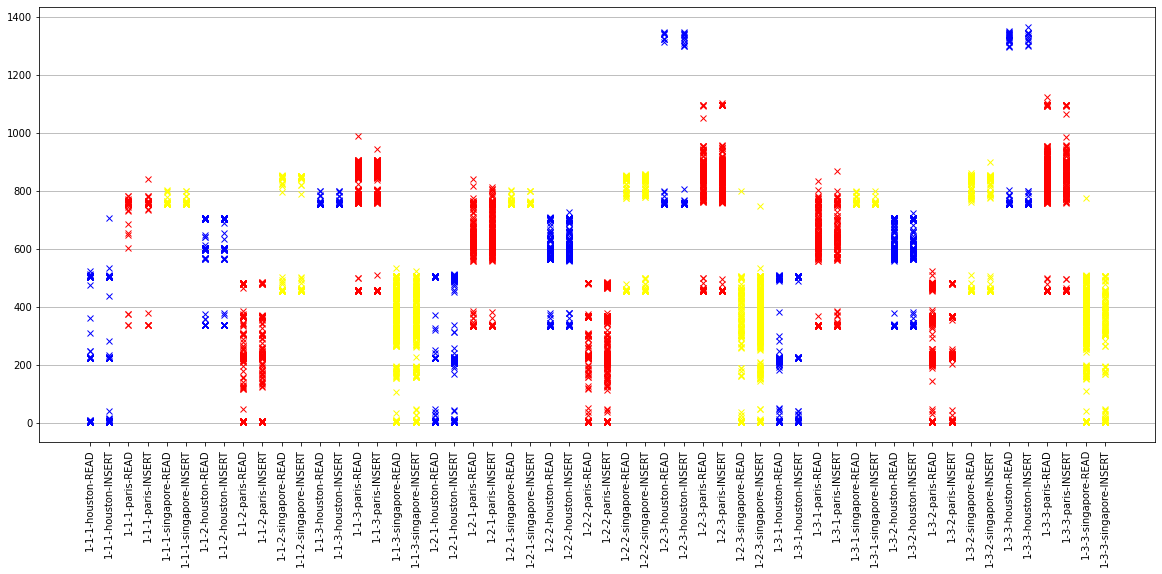

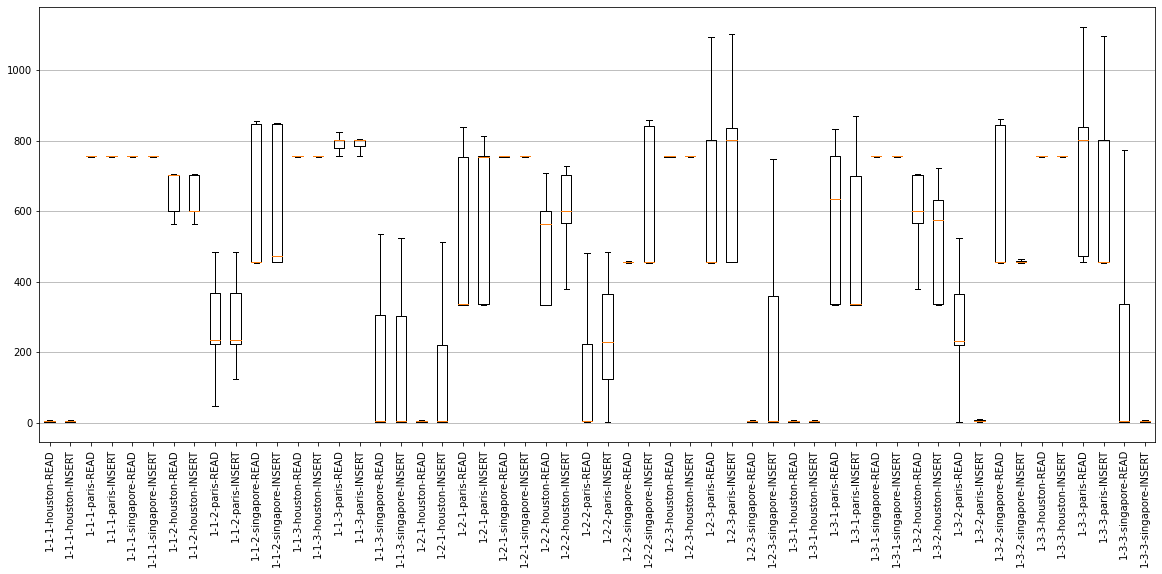

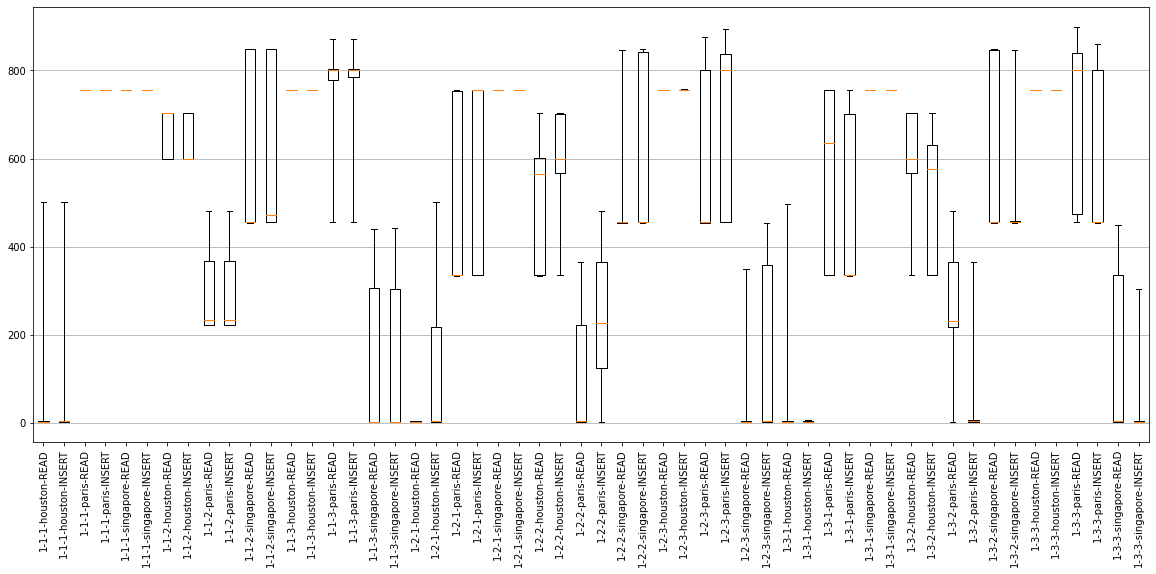

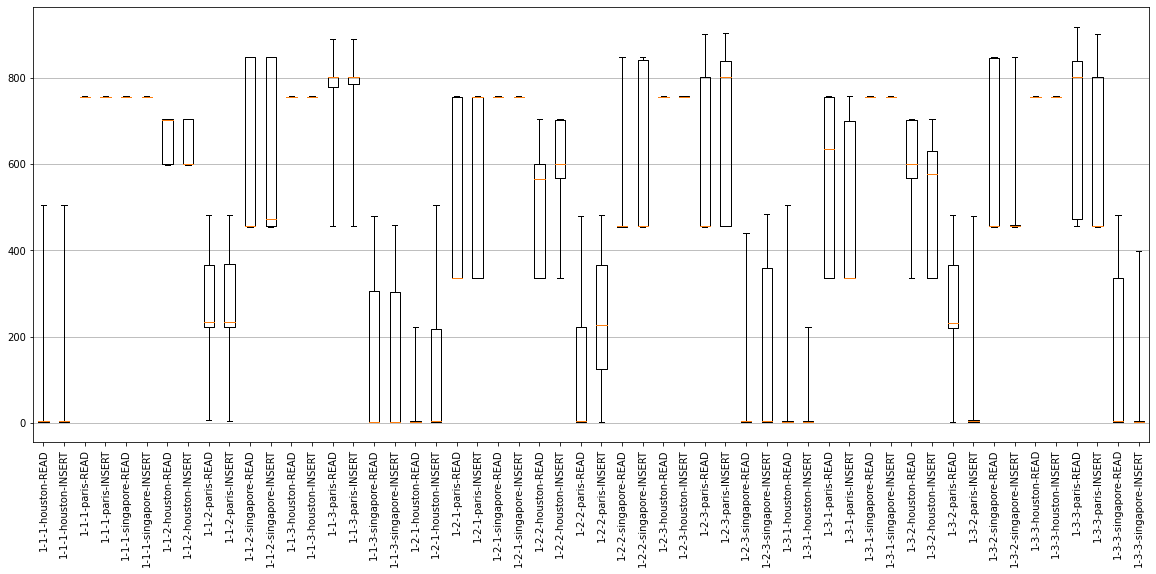

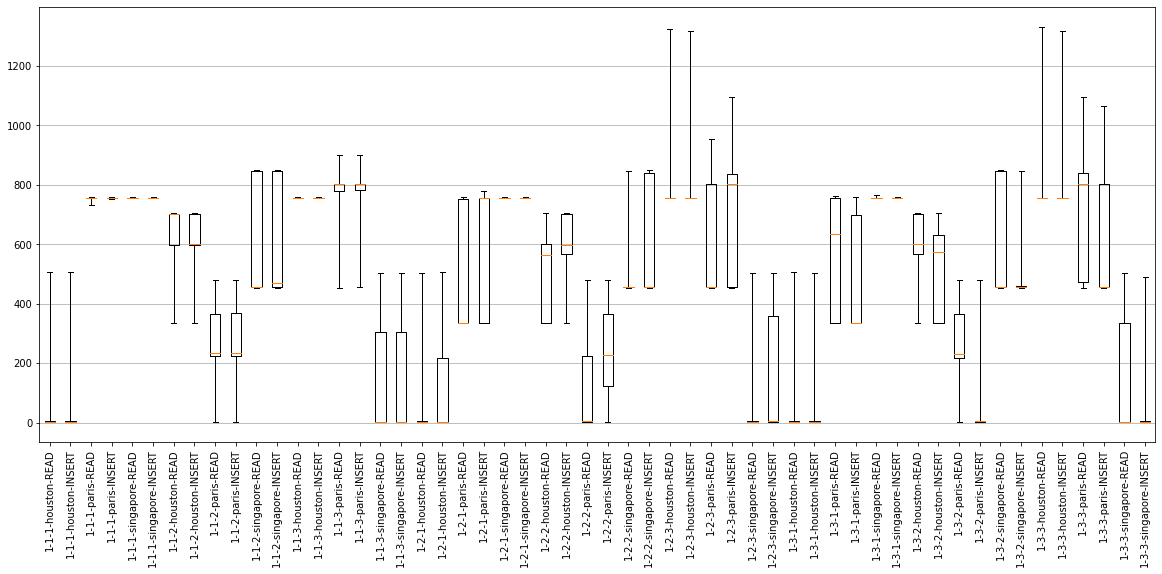

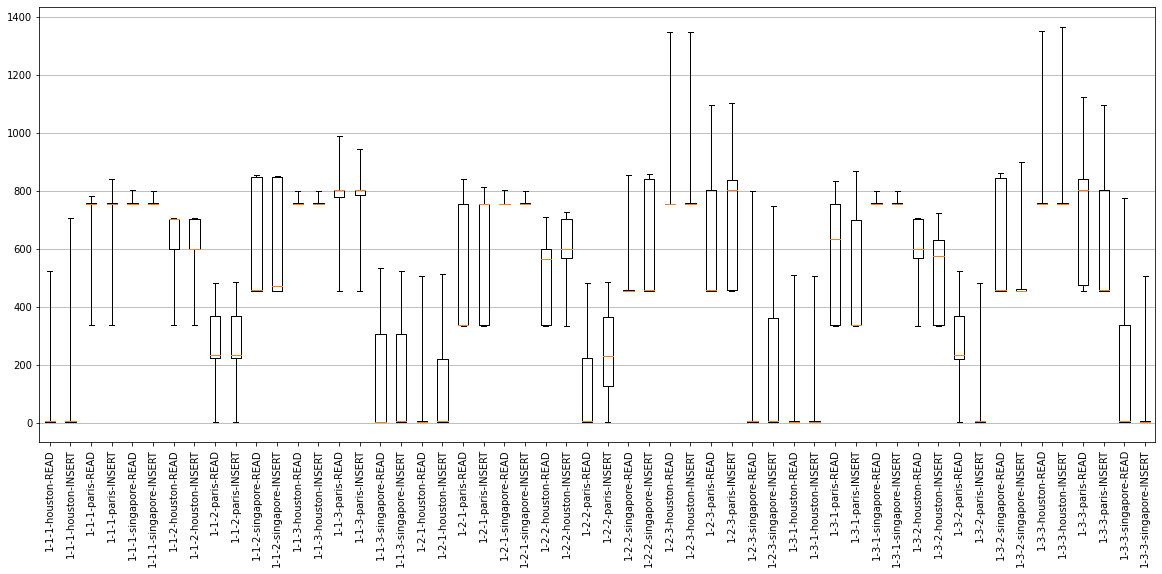

In [8]:
plot(wl_values, wl, replicas, name)

In [9]:
wl = 'workloadeqhot'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1675443.488 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 paris op_serial 0.0 
 	 rep_serial 1675443.488 
 	 op_parallel 0
1-1-1 singapore op_serial 1675443.488 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 1675443.488
1-1-2 houston op_serial 14495.355 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 paris op_serial 0.0 
 	 rep_serial 14495.355 
 	 op_parallel 0
1-1-2 singapore op_serial 14495.355 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 14495.355
1-1-3 houston op_serial 2276036.102 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 paris op_serial 0.0 
 	 rep_serial 2276036.102 
 	 op_parallel 0
1-1-3 singapore op_serial 2276036.102 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 2276036.102
1-2-1 houston op_serial 828122.979 
 	 rep_serial 0.0 
 	 op_parallel 847350.5719999999
1-2-1 paris op_serial 0.0 
 	 rep_serial 1675473.551 
 	 op_parallel 0.0
1-2-1 singapore op_serial 828122.979 
 	 rep_serial 0.0 
 	 op_parallel 847350.5719999999
1

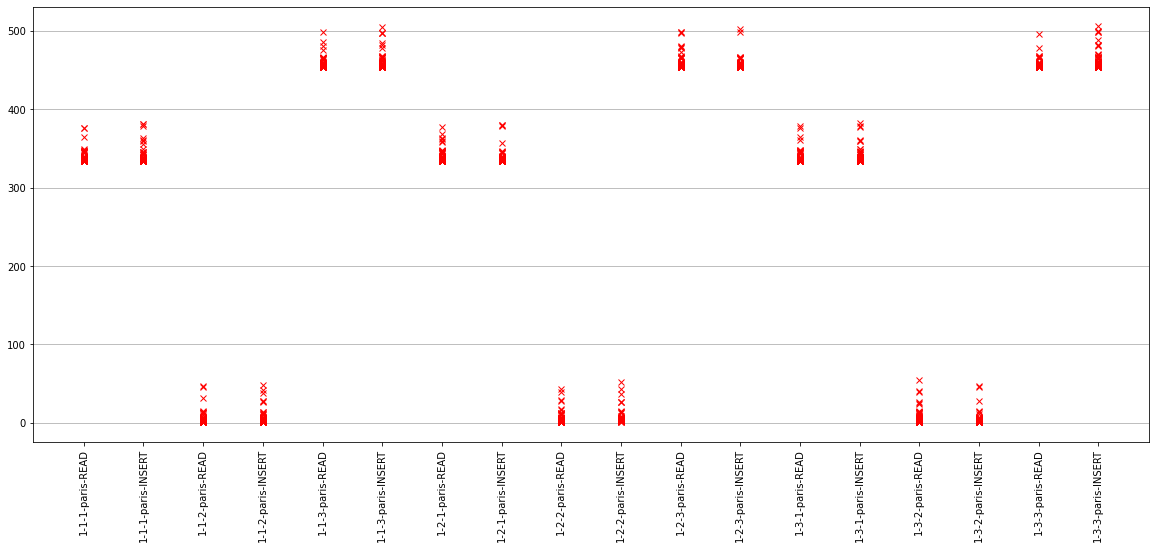

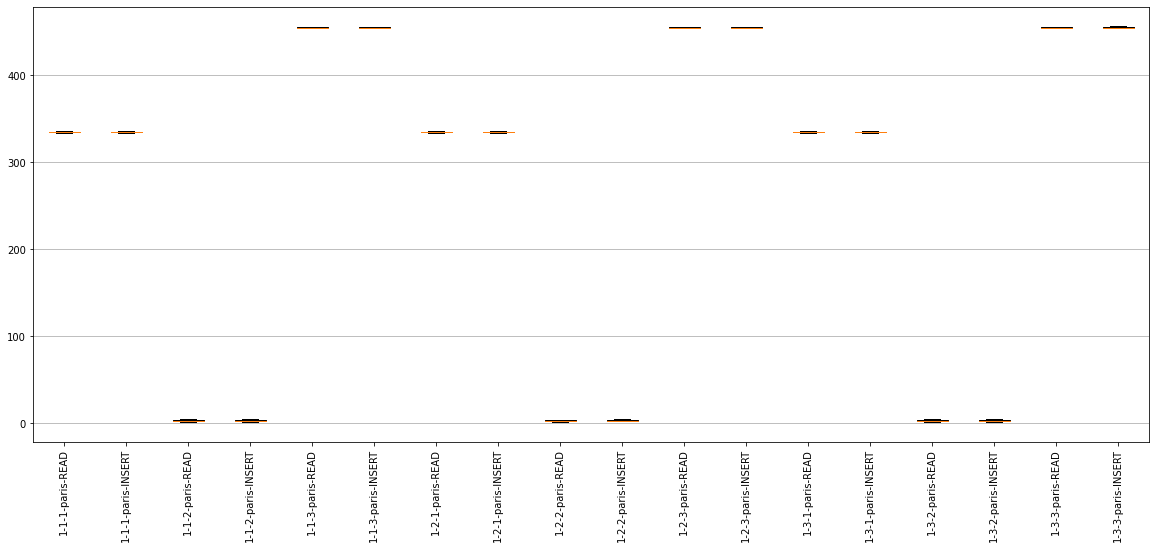

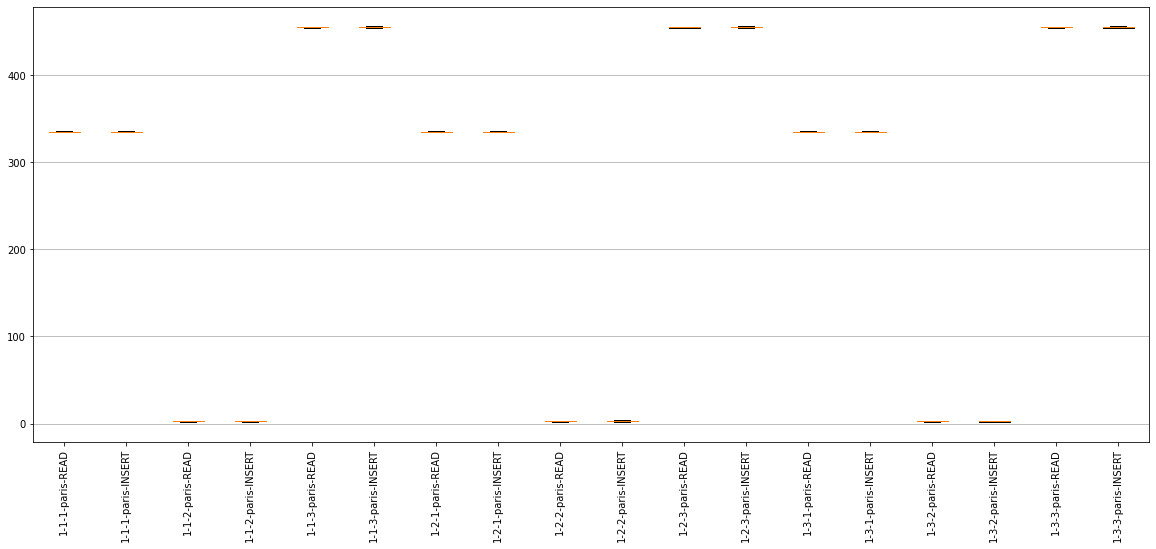

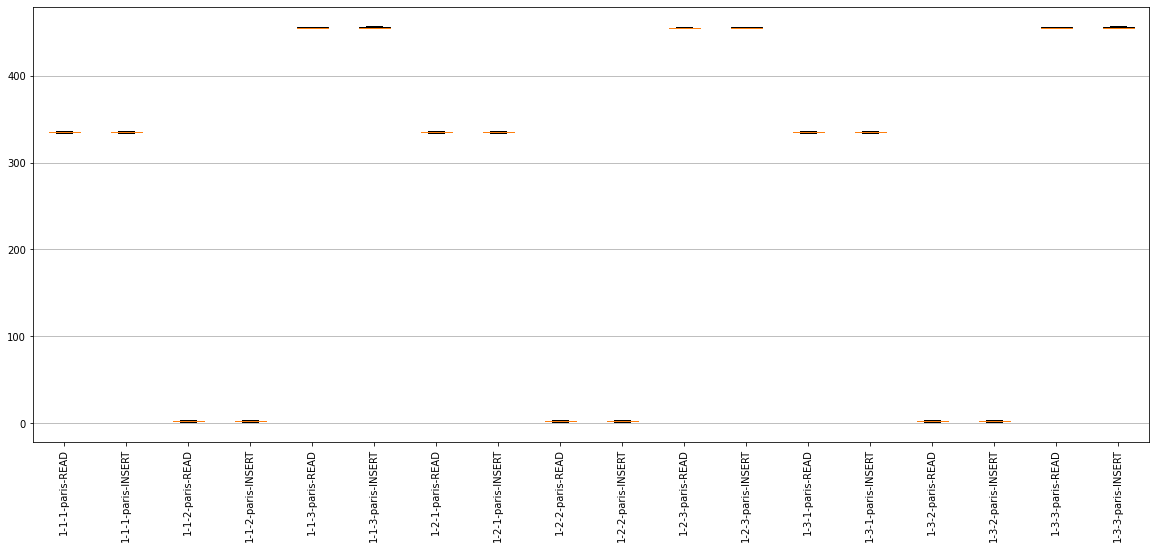

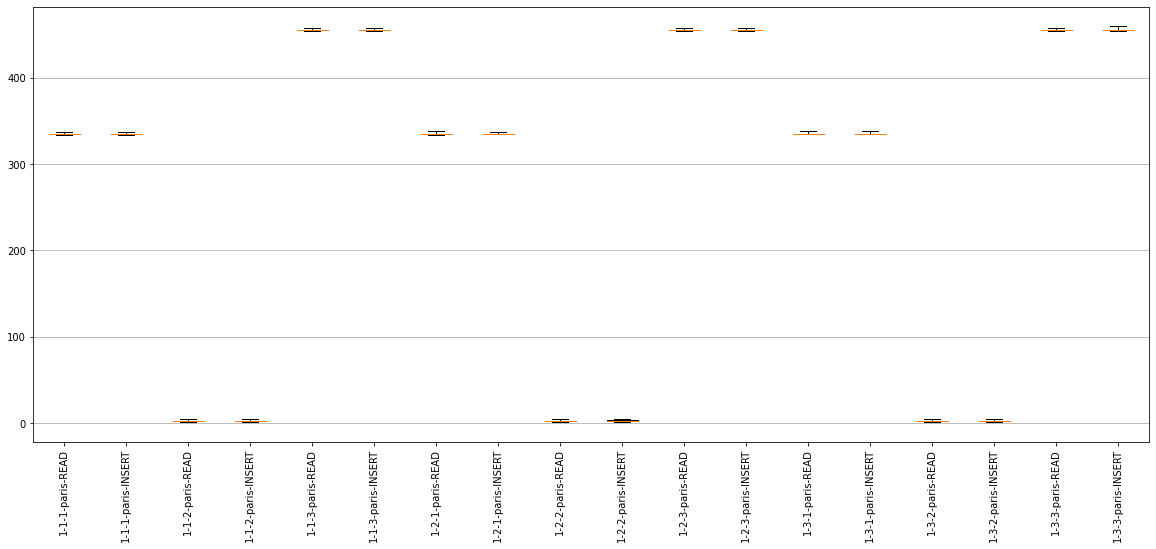

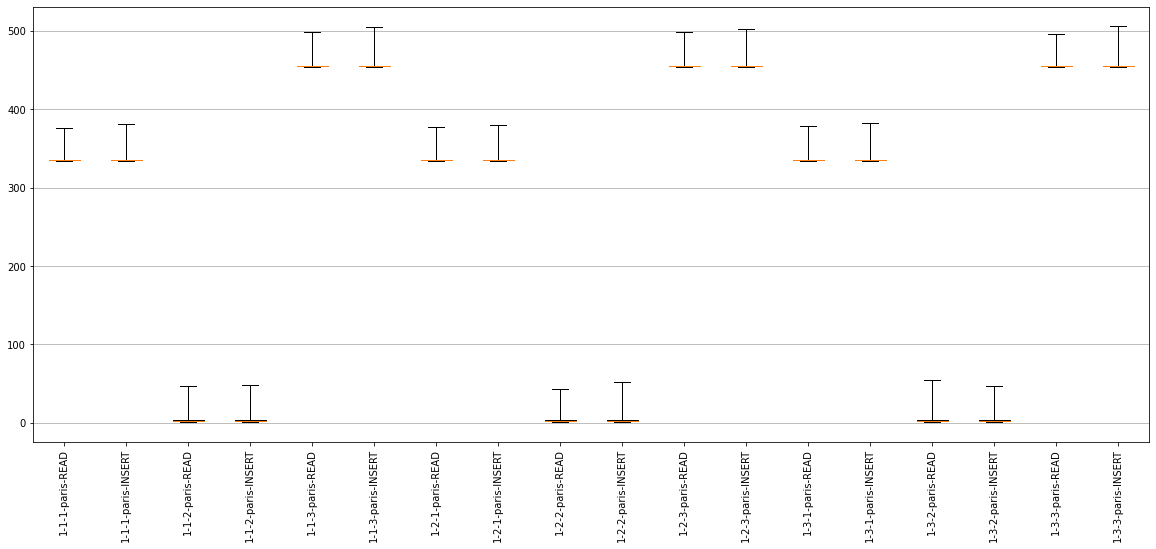

In [10]:
plot(wl_values, wl, replicas, name)

In [11]:
wl = 'workloadeqclust'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 839020.95 
 	 rep_serial 23390.097999999998 
 	 op_parallel 0
1-1-1 paris op_serial 23390.097999999998 
 	 rep_serial 839020.95 
 	 op_parallel 0
1-1-1 singapore op_serial 862411.048 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 862411.048
1-1-2 houston op_serial 23614.879999999997 
 	 rep_serial 838799.5460000001 
 	 op_parallel 0
1-1-2 paris op_serial 838799.5460000001 
 	 rep_serial 23614.879999999997 
 	 op_parallel 0
1-1-2 singapore op_serial 862414.4260000001 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 862414.4260000001
1-1-3 houston op_serial 1888520.4840000002 
 	 rep_serial 1890295.132 
 	 op_parallel 0
1-1-3 paris op_serial 1890295.132 
 	 rep_serial 1888520.4840000002 
 	 op_parallel 0
1-1-3 singapore op_serial 3778815.6160000004 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 3778815.6160000004
1-2-1 houston op_serial 411145.446 
 	 rep_serial 23560.073999999997 
 	 op_parallel 427707.03099999996
1-2-1 paris op_ser

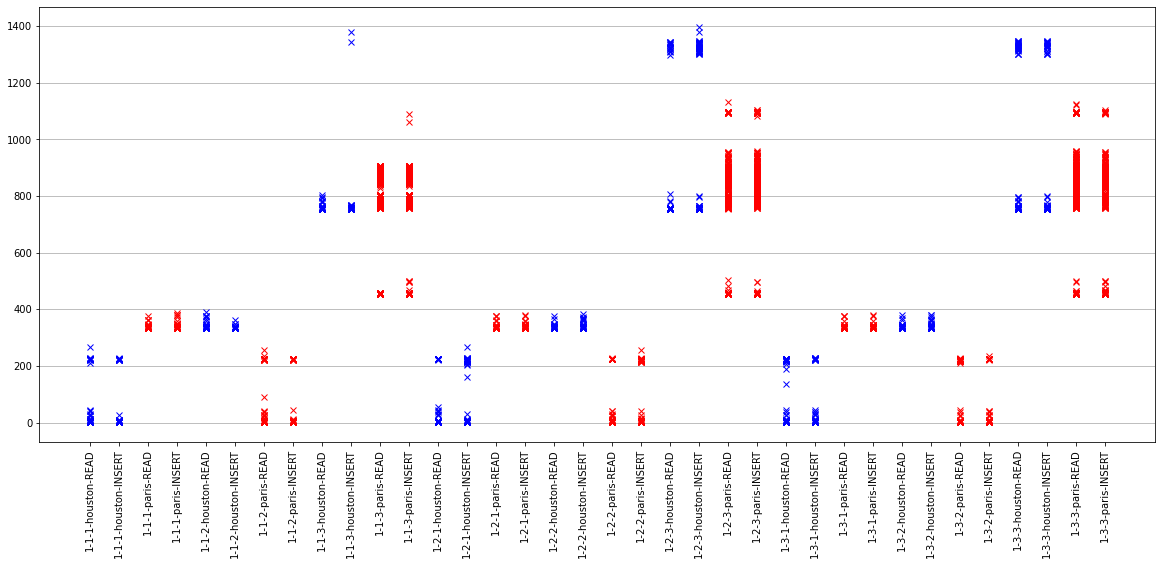

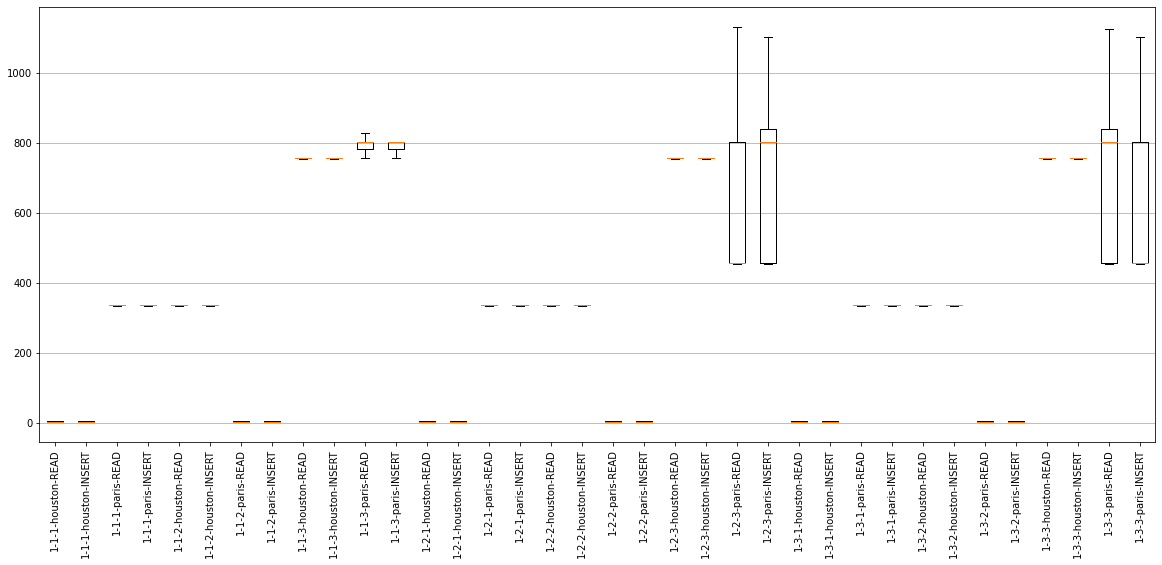

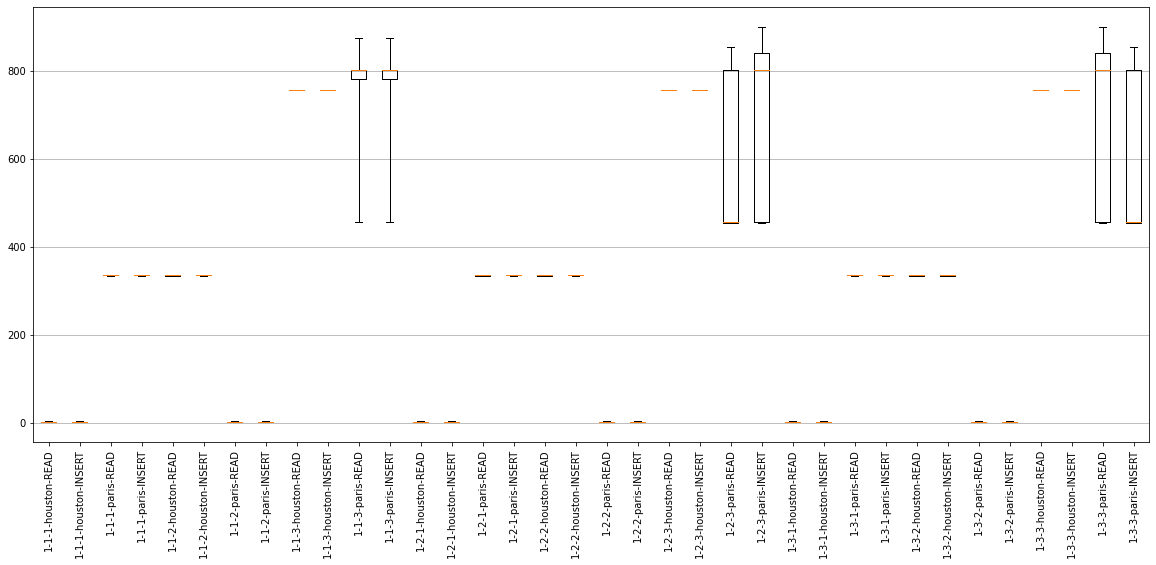

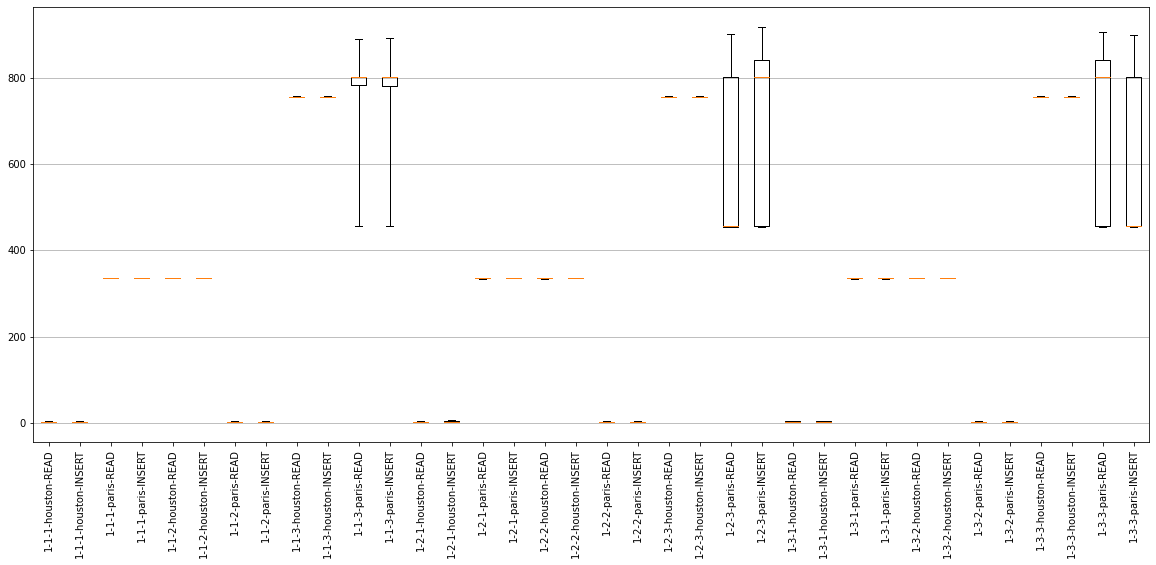

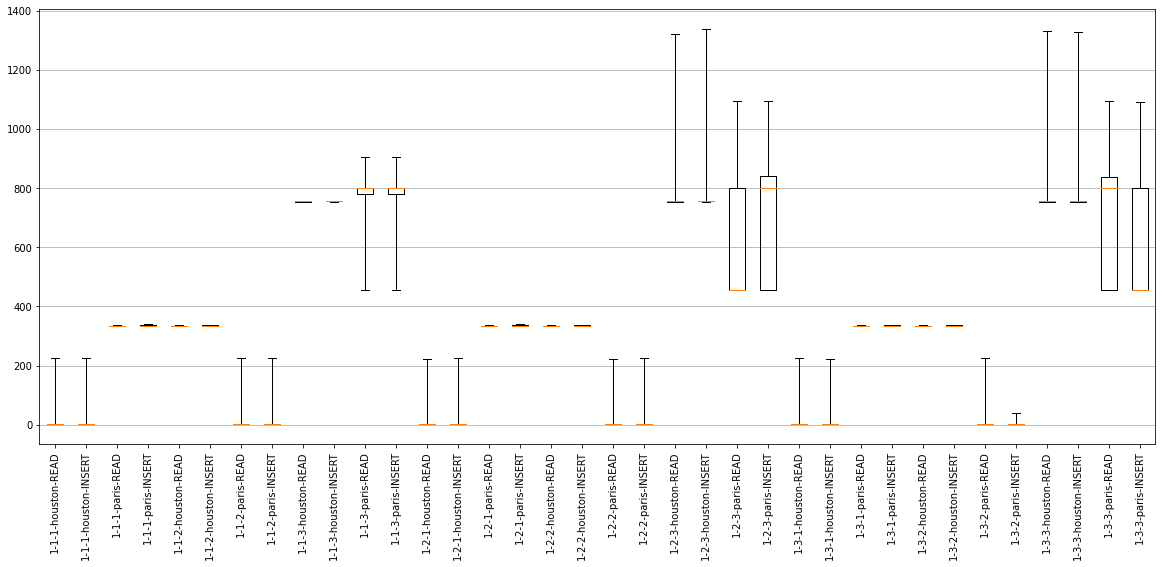

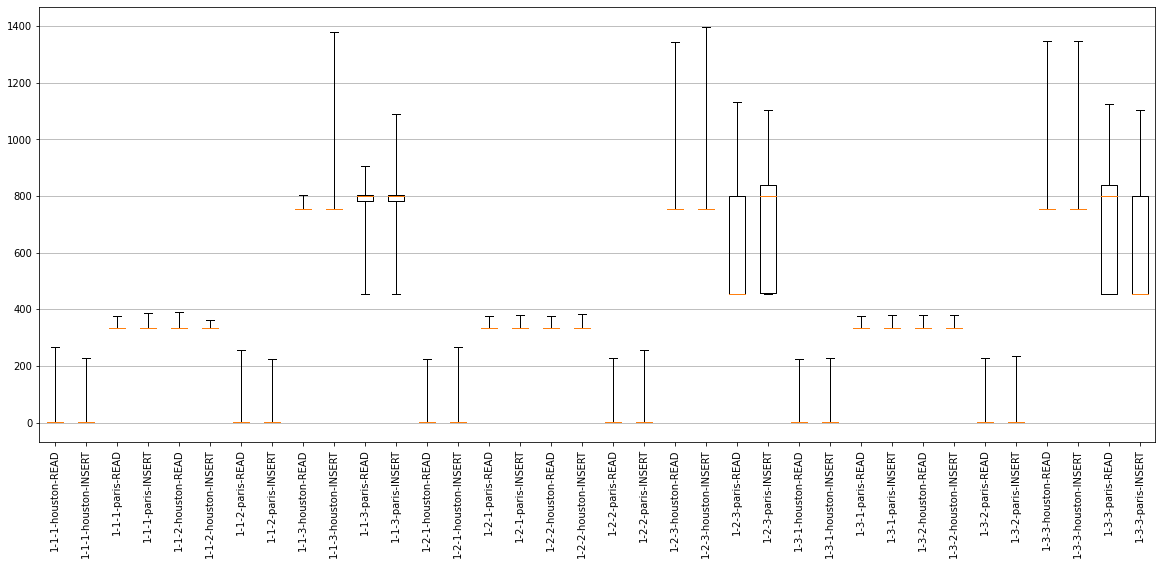

In [12]:
plot(wl_values, wl, replicas, name)

In [13]:
wl = 'workloadhoteq'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 2518176.285 
 	 rep_serial 102582.66199999998 
 	 op_parallel 0
1-1-1 paris op_serial 1361066.412 
 	 rep_serial 1259692.5350000001 
 	 op_parallel 0
1-1-1 singapore op_serial 1362275.1970000002 
 	 rep_serial 1258483.75 
 	 op_parallel 0
1-1-1 nonparallelism 2620758.947
1-1-2 houston op_serial 1441955.512 
 	 rep_serial 866110.877 
 	 op_parallel 0
1-1-2 paris op_serial 1885908.69 
 	 rep_serial 422157.699 
 	 op_parallel 0
1-1-2 singapore op_serial 1288268.576 
 	 rep_serial 1019797.8130000001 
 	 op_parallel 0
1-1-2 nonparallelism 2308066.389
1-1-3 houston op_serial 1459946.933 
 	 rep_serial 1260278.251 
 	 op_parallel 0
1-1-3 paris op_serial 1458080.8769999999 
 	 rep_serial 1262144.307 
 	 op_parallel 0
1-1-3 singapore op_serial 2522422.558 
 	 rep_serial 197802.626 
 	 op_parallel 0
1-1-3 nonparallelism 2720225.1840000004
1-2-1 houston op_serial 2518075.625 
 	 rep_serial 129245.065 
 	 op_parallel 0.0
1-2-1 paris op_serial 1387829.6239999998 
 	 rep_seri

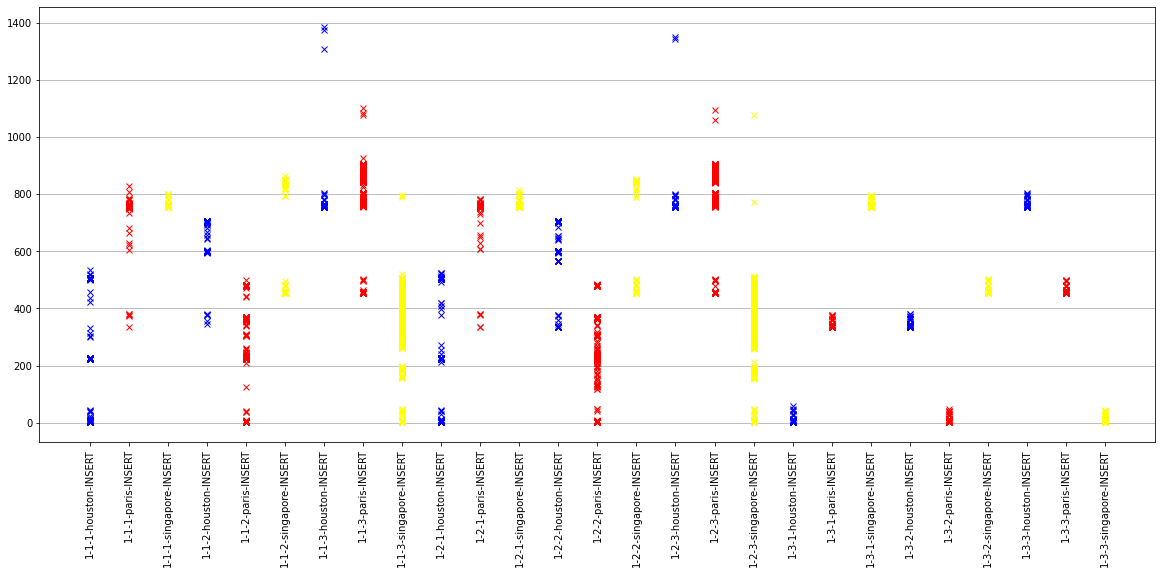

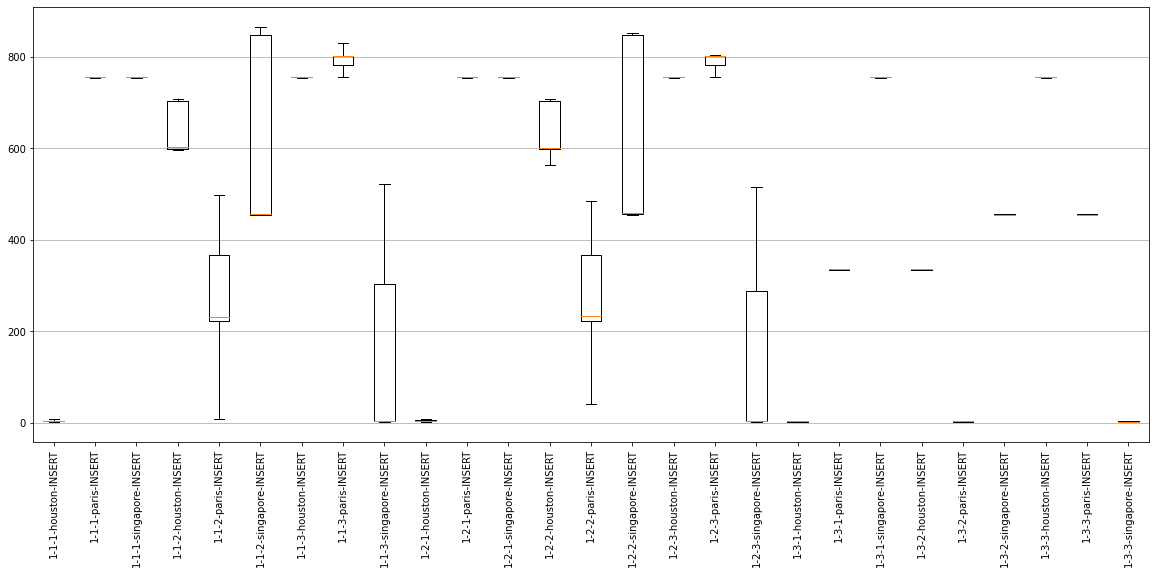

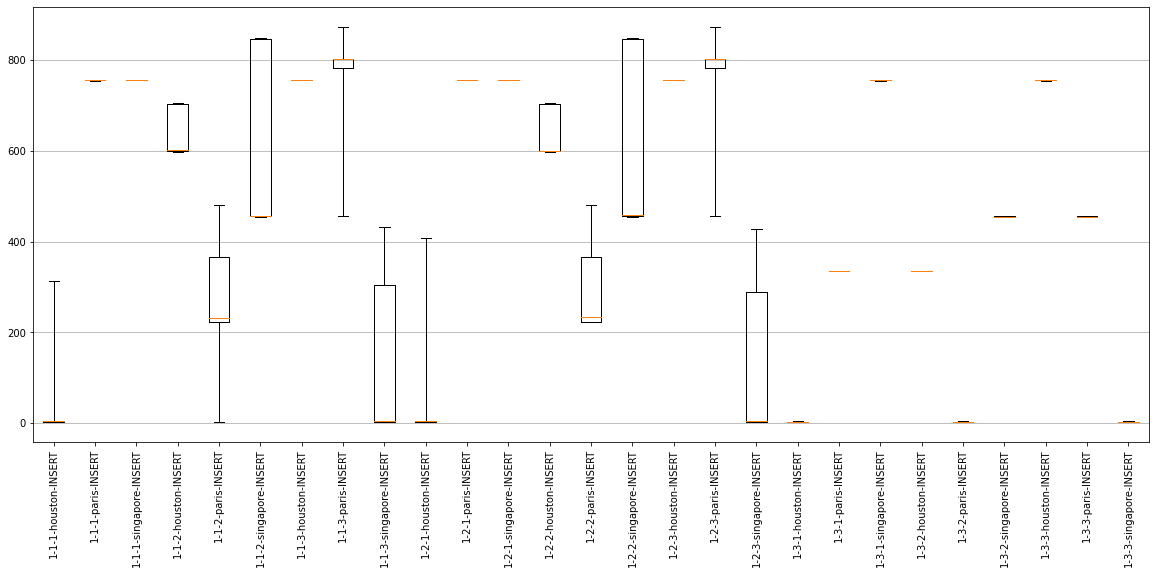

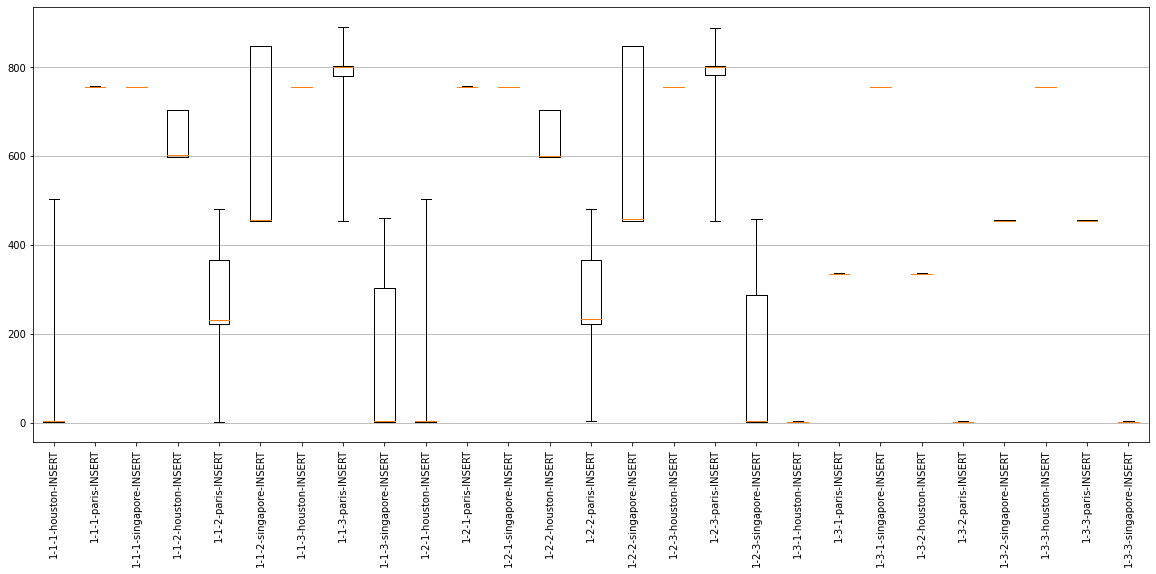

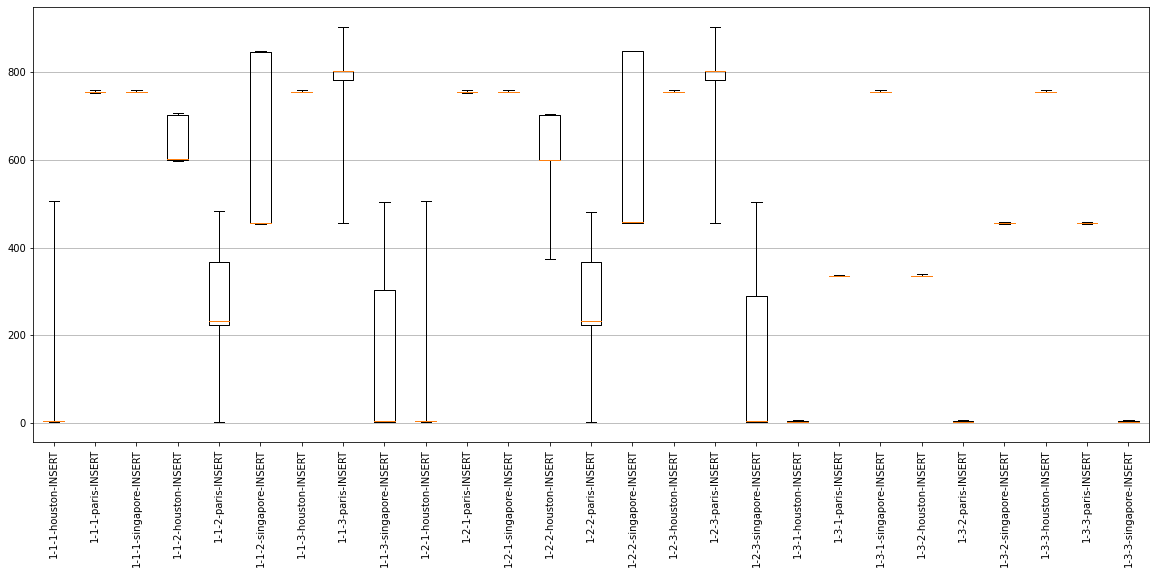

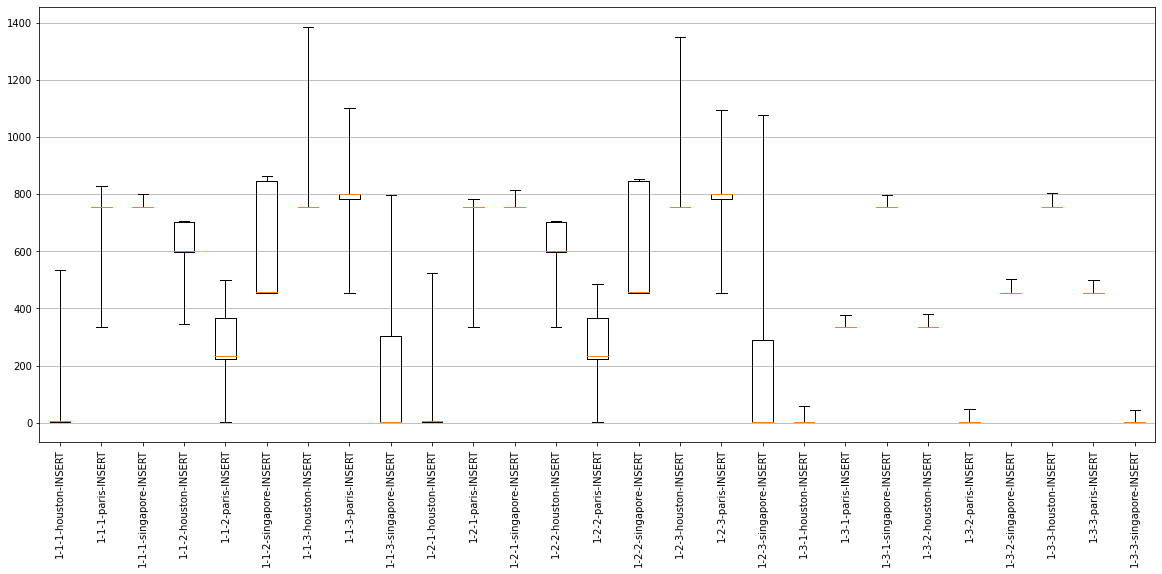

In [14]:
plot(wl_values, wl, replicas, name)

In [15]:
wl = 'workloadhothot'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 1675772.104 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 paris op_serial 0.0 
 	 rep_serial 1675772.104 
 	 op_parallel 0
1-1-1 singapore op_serial 1675772.104 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 1675772.104
1-1-2 houston op_serial 14933.565999999999 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 paris op_serial 0.0 
 	 rep_serial 14933.565999999999 
 	 op_parallel 0
1-1-2 singapore op_serial 14933.565999999999 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 14933.565999999999
1-1-3 houston op_serial 2276066.629 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 paris op_serial 0.0 
 	 rep_serial 2276066.629 
 	 op_parallel 0
1-1-3 singapore op_serial 2276066.629 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 2276066.629
1-2-1 houston op_serial 1675865.644 
 	 rep_serial 0.0 
 	 op_parallel 0.0
1-2-1 paris op_serial 0.0 
 	 rep_serial 1675865.644 
 	 op_parallel 0.0
1-2-1 singapore op_serial 1675865.644 
 	 rep_serial 0.0 
 	 op_para

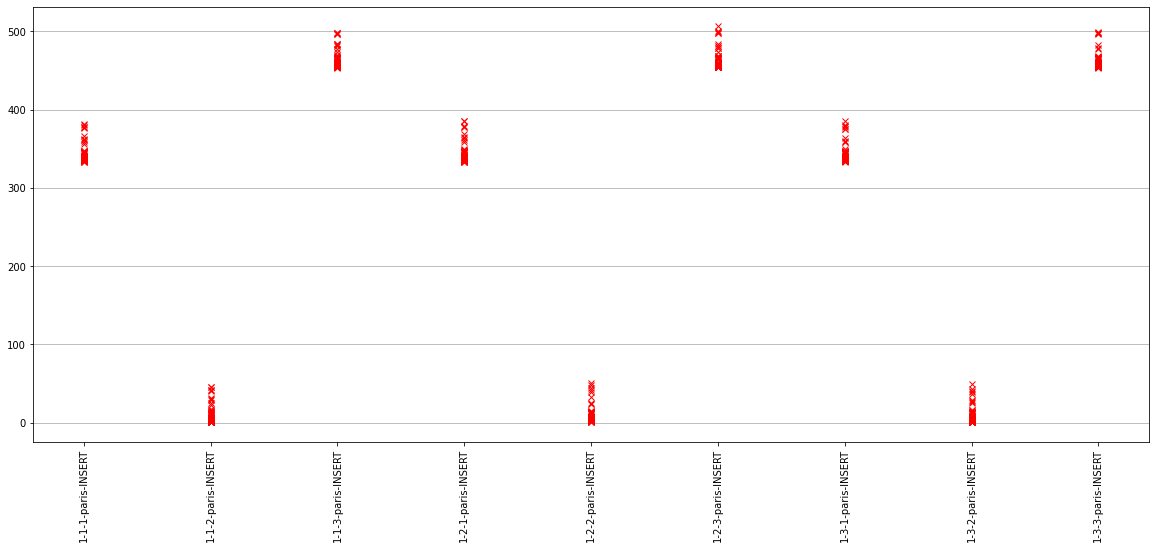

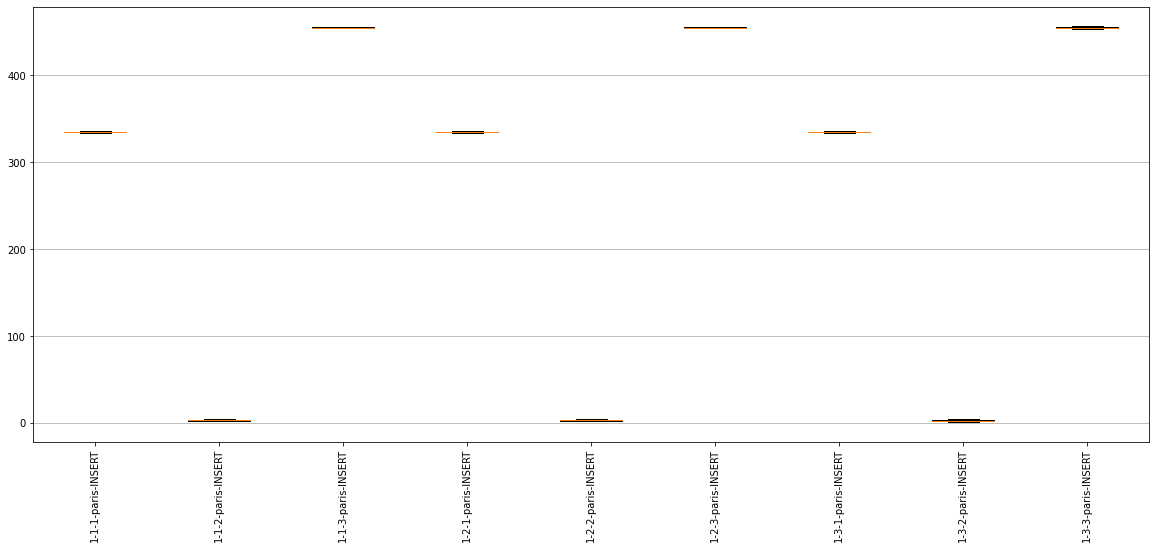

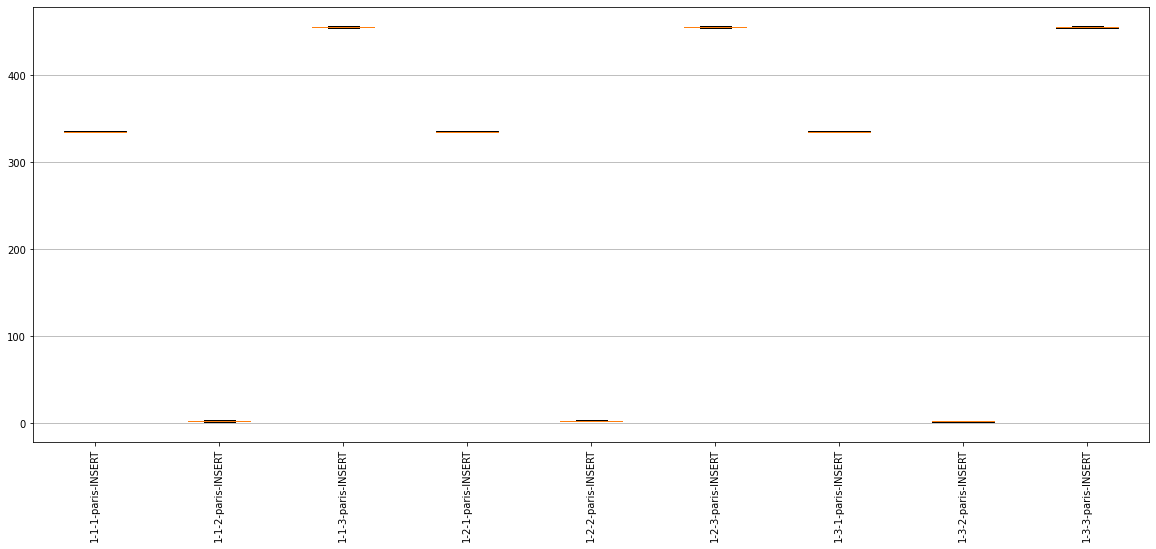

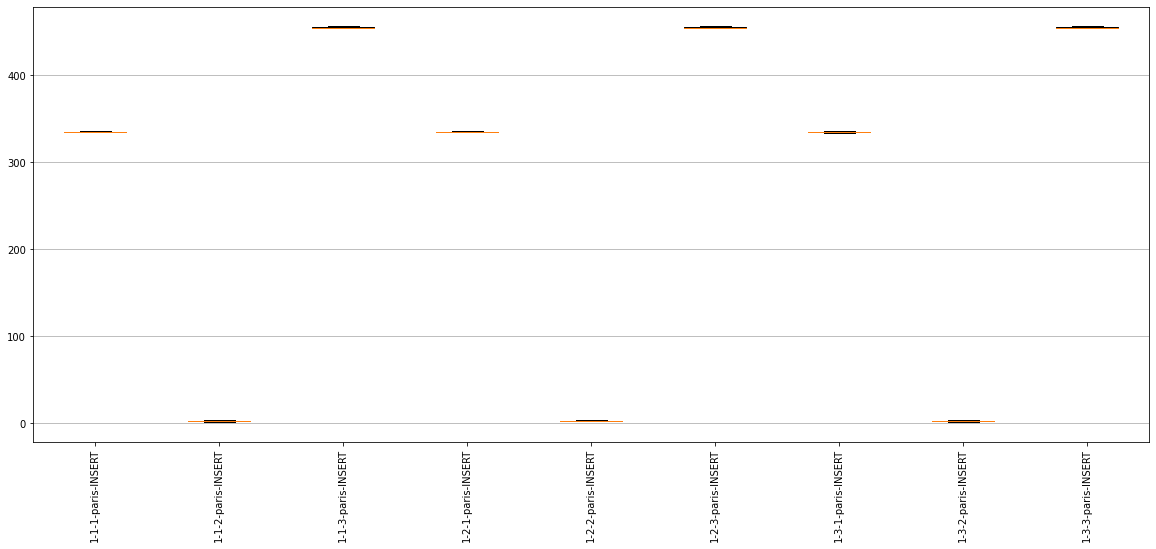

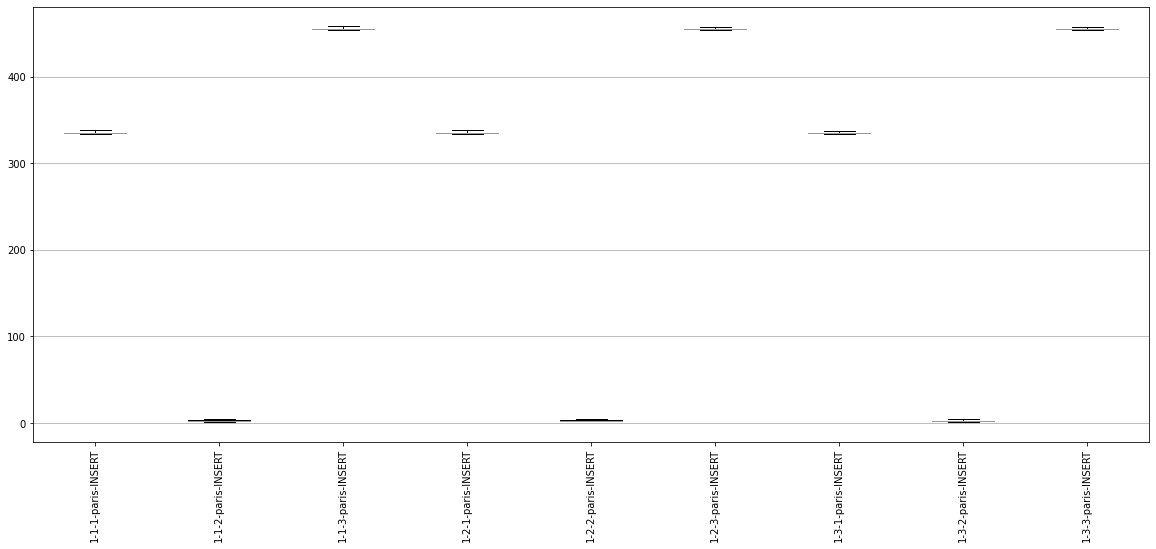

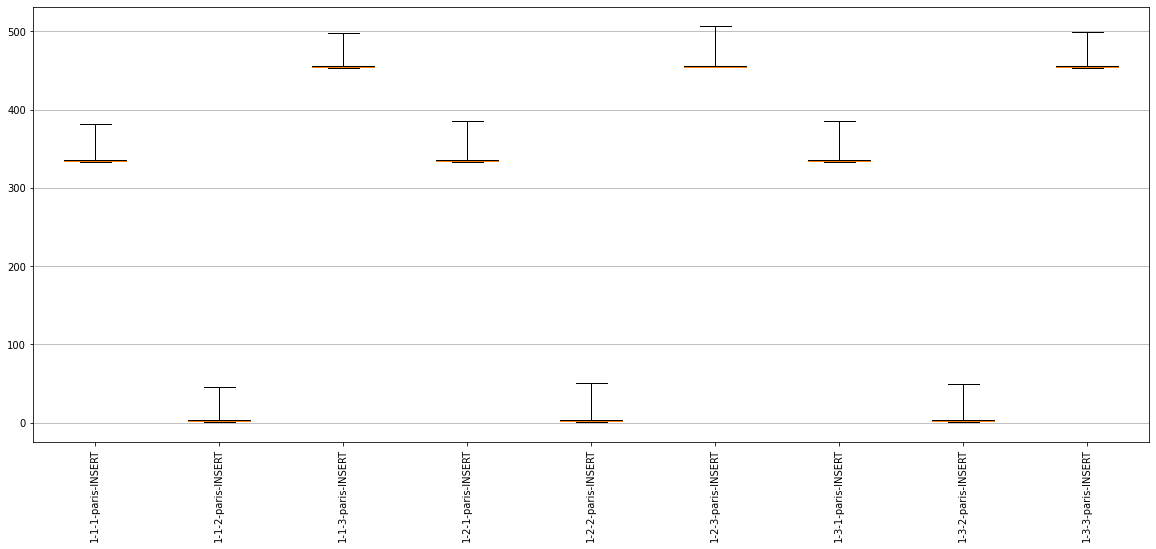

In [16]:
plot(wl_values, wl, replicas, name)

In [17]:
wl = 'workloadhotclust'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 838903.672 
 	 rep_serial 24225.72 
 	 op_parallel 0
1-1-1 paris op_serial 24225.72 
 	 rep_serial 838903.672 
 	 op_parallel 0
1-1-1 singapore op_serial 863129.392 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-1 nonparallelism 863129.392
1-1-2 houston op_serial 22889.371 
 	 rep_serial 838910.9859999999 
 	 op_parallel 0
1-1-2 paris op_serial 838910.9859999999 
 	 rep_serial 22889.371 
 	 op_parallel 0
1-1-2 singapore op_serial 861800.357 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-2 nonparallelism 861800.357
1-1-3 houston op_serial 1888592.78 
 	 rep_serial 1889244.9070000001 
 	 op_parallel 0
1-1-3 paris op_serial 1889244.9070000001 
 	 rep_serial 1888592.78 
 	 op_parallel 0
1-1-3 singapore op_serial 3777837.687 
 	 rep_serial 0.0 
 	 op_parallel 0
1-1-3 nonparallelism 3777837.687
1-2-1 houston op_serial 838756.726 
 	 rep_serial 23464.588 
 	 op_parallel 0.0
1-2-1 paris op_serial 23464.588 
 	 rep_serial 838756.726 
 	 op_parallel 0.0
1-2-1 singapore op_serial 8622

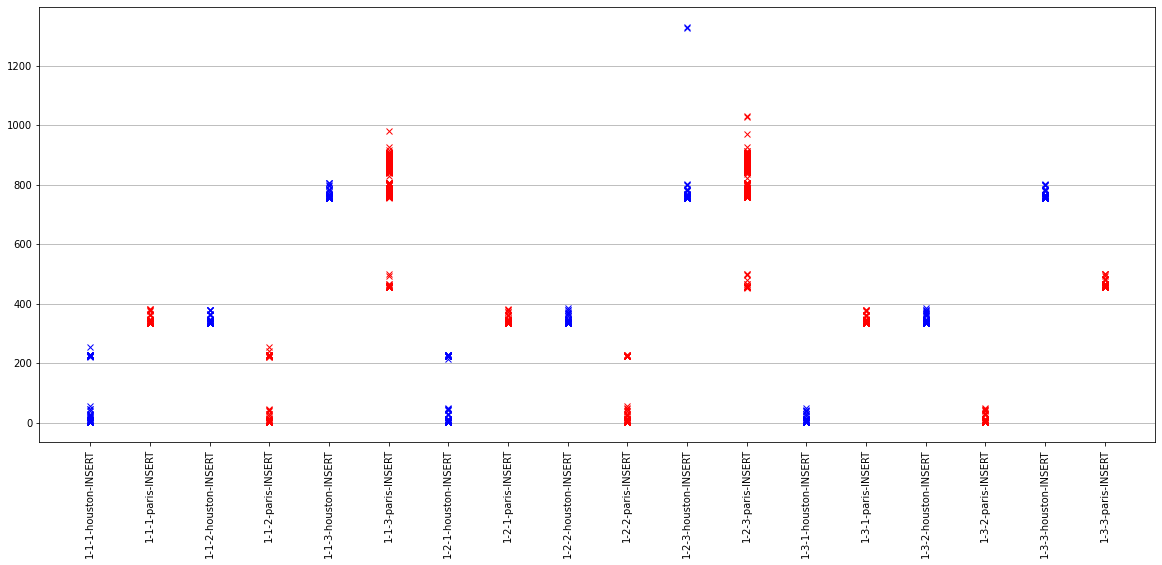

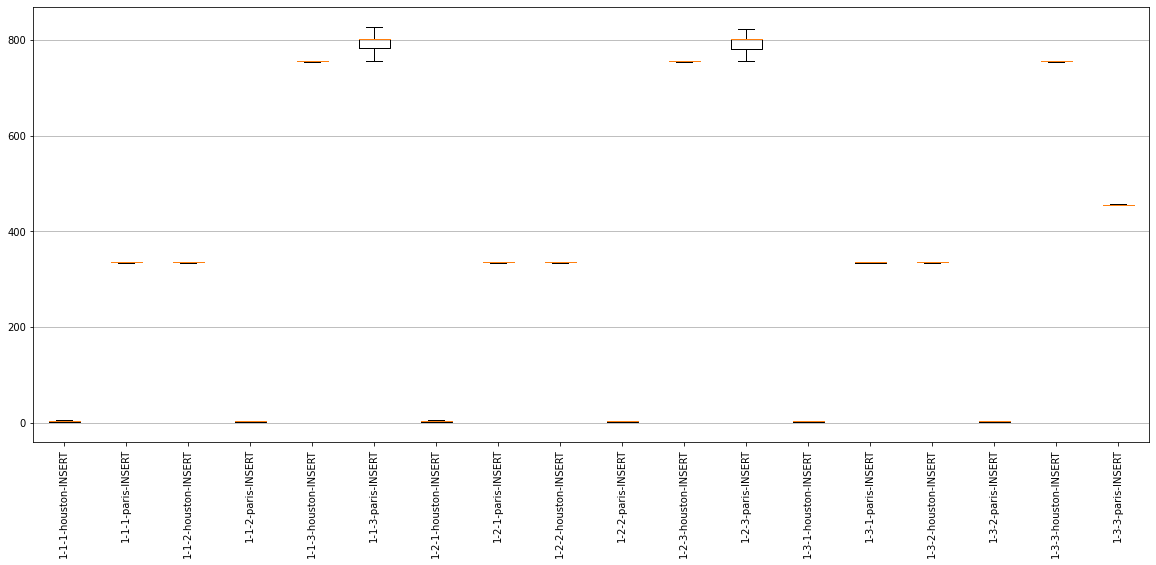

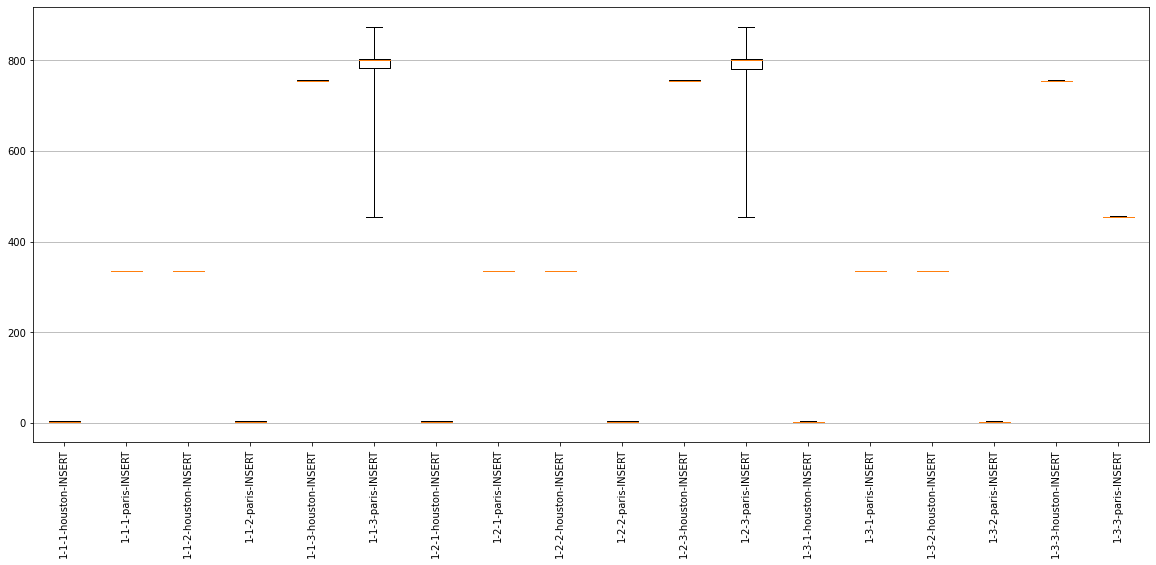

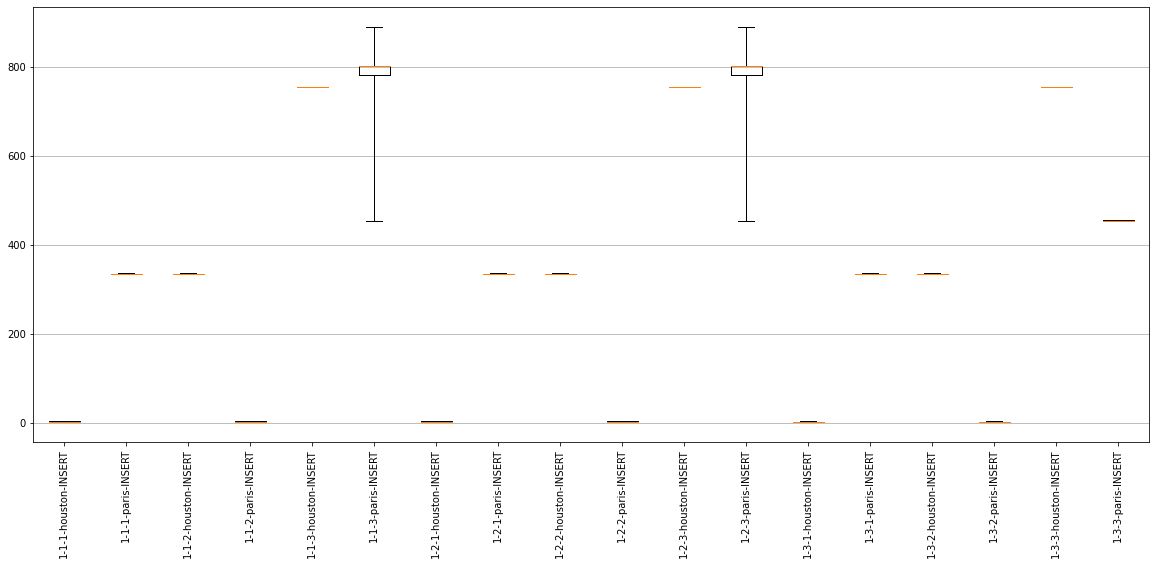

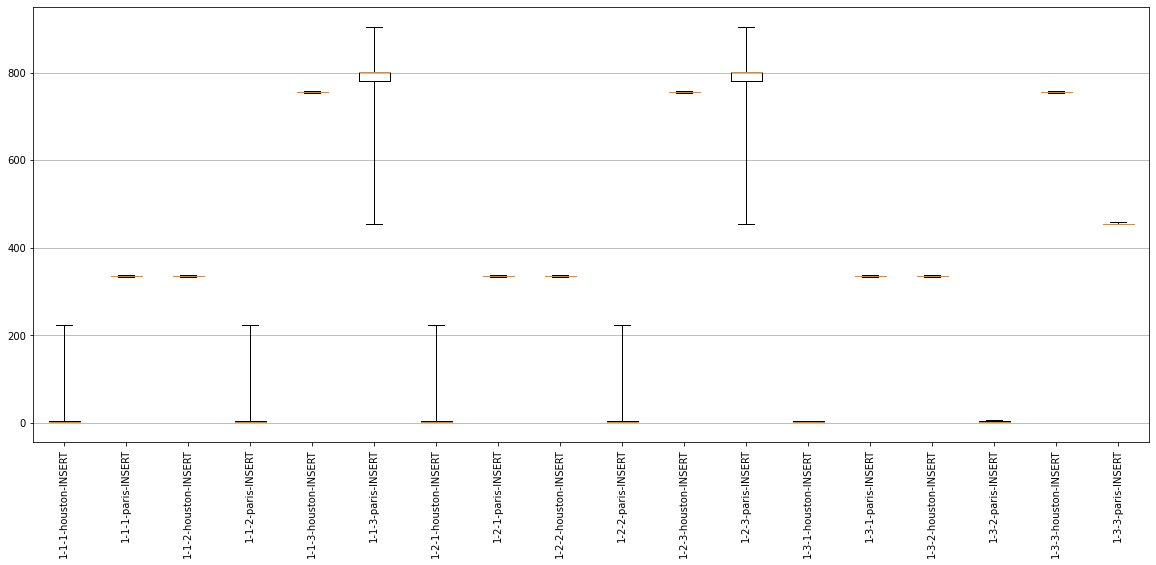

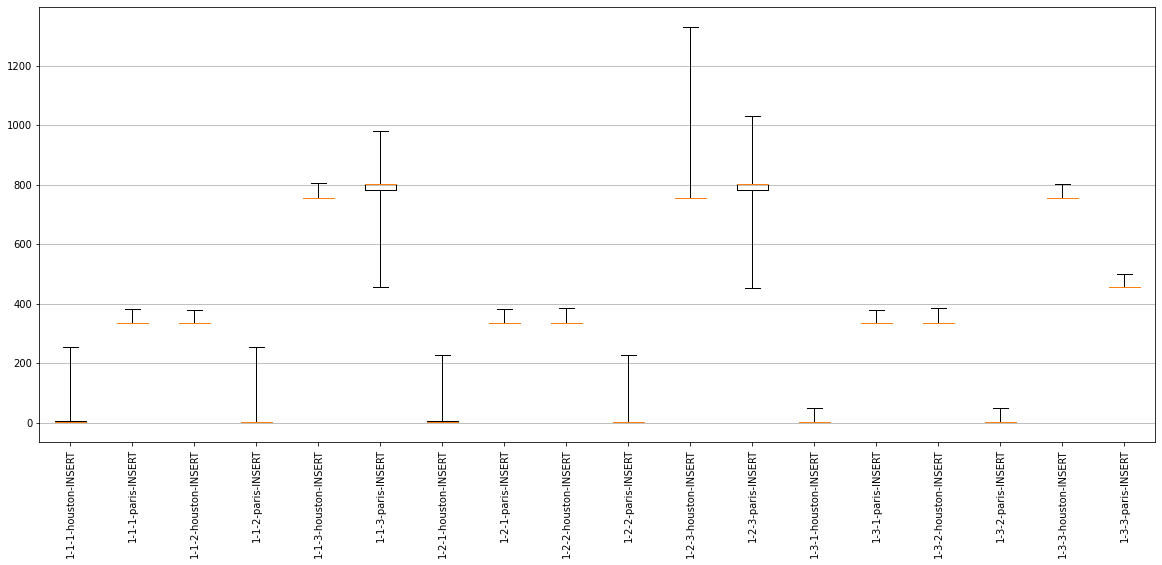

In [18]:
plot(wl_values, wl, replicas, name)

In [19]:
wl = 'workloadF'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 2093919.5610000002 
 	 rep_serial 50412.958 
 	 op_parallel 0
1-1-1 paris op_serial 678014.8099999999 
 	 rep_serial 1466317.7090000003 
 	 op_parallel 0
1-1-1 singapore op_serial 1516730.6670000004 
 	 rep_serial 627601.852 
 	 op_parallel 0
1-1-1 nonparallelism 2144332.5190000003
1-1-2 houston op_serial 1069817.686 
 	 rep_serial 533751.5349999999 
 	 op_parallel 0
1-1-2 paris op_serial 1065579.129 
 	 rep_serial 537990.092 
 	 op_parallel 0
1-1-2 singapore op_serial 1071741.6269999999 
 	 rep_serial 531827.594 
 	 op_parallel 0
1-1-2 nonparallelism 1603569.221
1-1-3 houston op_serial 1874062.2490000003 
 	 rep_serial 631966.7679999999 
 	 op_parallel 0
1-1-3 paris op_serial 736331.8139999999 
 	 rep_serial 1769697.2030000002 
 	 op_parallel 0
1-1-3 singapore op_serial 2401663.971 
 	 rep_serial 104365.046 
 	 op_parallel 0
1-1-3 nonparallelism 2506029.017
1-2-1 houston op_serial 1102651.577 
 	 rep_serial 12376.238000000001 
 	 op_parallel 890184.358
1-2-1 pa

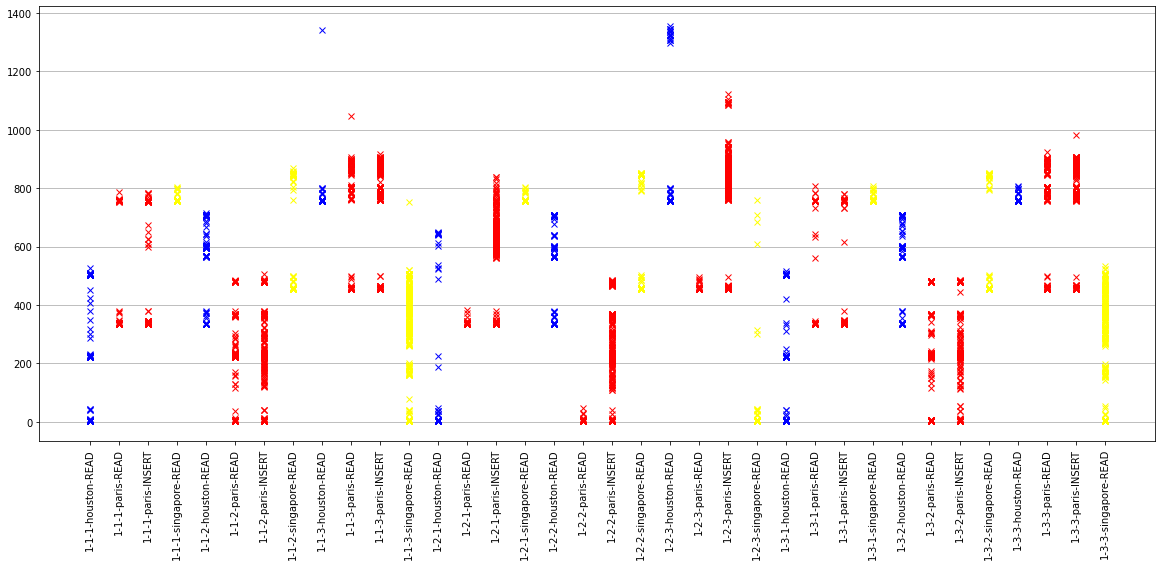

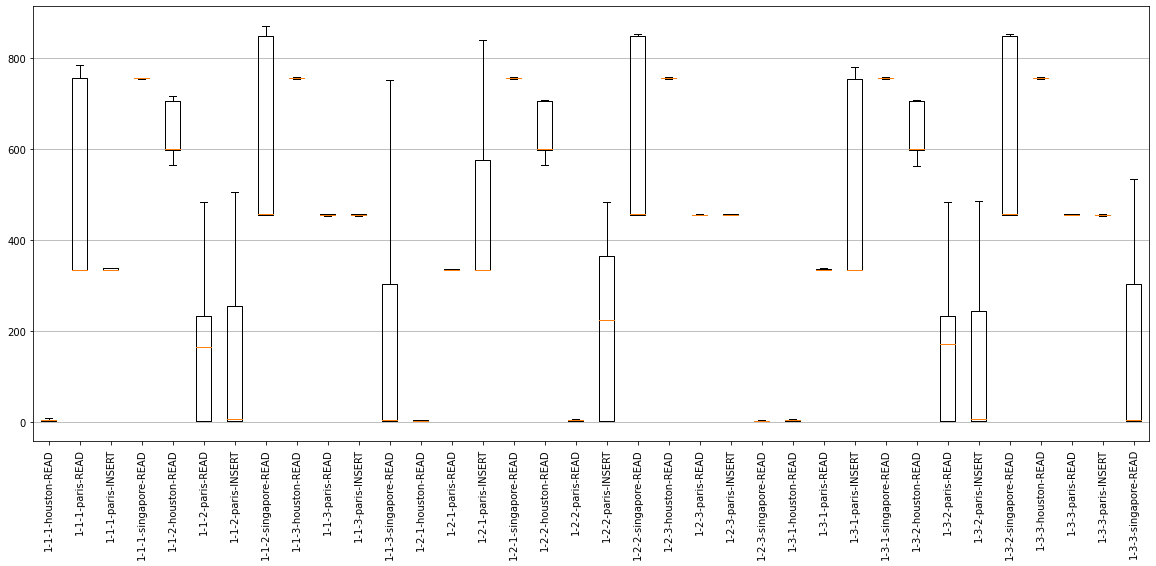

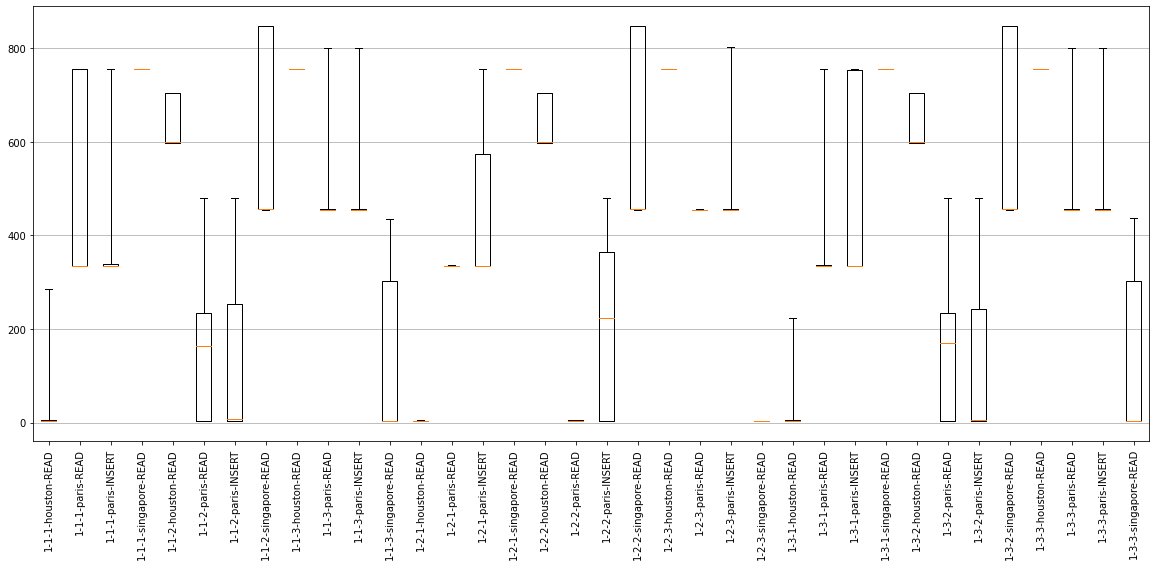

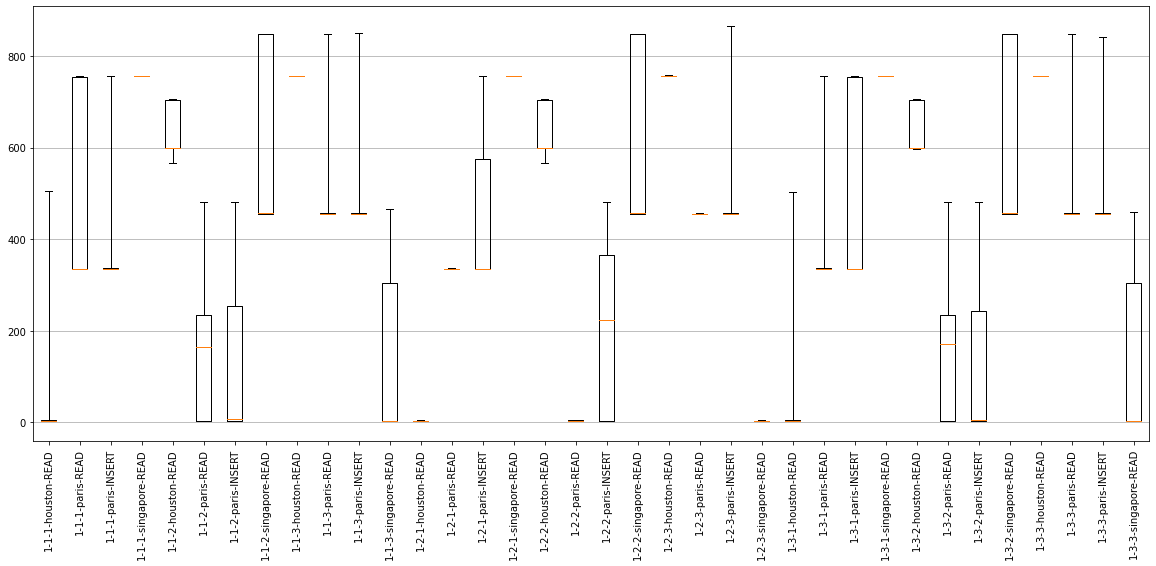

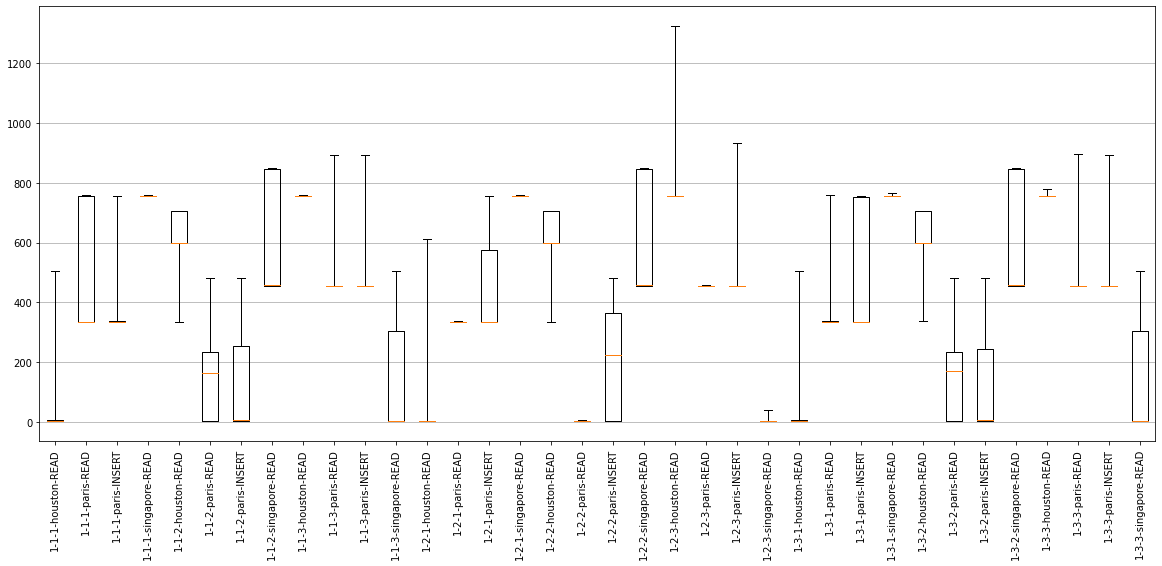

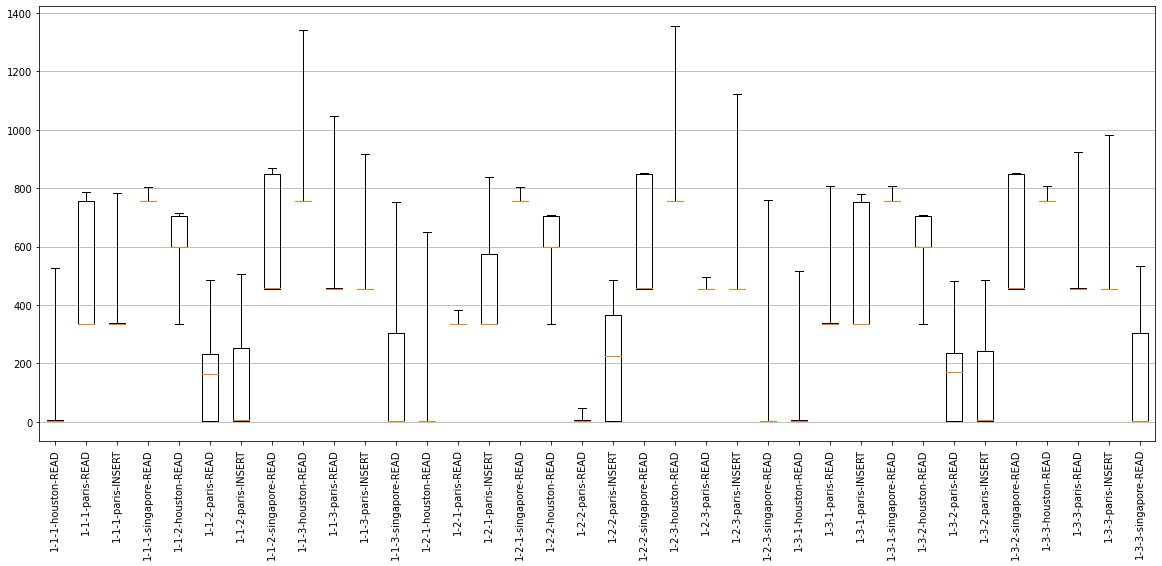

In [20]:
plot(wl_values, wl, replicas, name)

In [21]:
wl = 'workloadG'
name = 'go'
printmetrics(wl_values, wl)
print('*************stats**************')
printstats(wl_values, wl)

1-1-1 houston op_serial 2308424.783 
 	 rep_serial 64020.477 
 	 op_parallel 0
1-1-1 paris op_serial 1008940.99 
 	 rep_serial 1363504.27 
 	 op_parallel 0
1-1-1 singapore op_serial 1427524.747 
 	 rep_serial 944920.513 
 	 op_parallel 0
1-1-1 nonparallelism 2372445.26
1-1-2 houston op_serial 1557061.7489999998 
 	 rep_serial 807328.025 
 	 op_parallel 0
1-1-2 paris op_serial 1615384.81 
 	 rep_serial 749004.9639999999 
 	 op_parallel 0
1-1-2 singapore op_serial 1556332.989 
 	 rep_serial 808056.7849999999 
 	 op_parallel 0
1-1-2 nonparallelism 2364389.774
1-1-3 houston op_serial 1669173.191 
 	 rep_serial 944979.778 
 	 op_parallel 0
1-1-3 paris op_serial 1099474.696 
 	 rep_serial 1514678.273 
 	 op_parallel 0
1-1-3 singapore op_serial 2459658.051 
 	 rep_serial 154494.918 
 	 op_parallel 0
1-1-3 nonparallelism 2614152.969
1-2-1 houston op_serial 1362844.4300000002 
 	 rep_serial 23086.016 
 	 op_parallel 944738.7420000001
1-2-1 paris op_serial 0.0 
 	 rep_serial 1362844.4300000002 


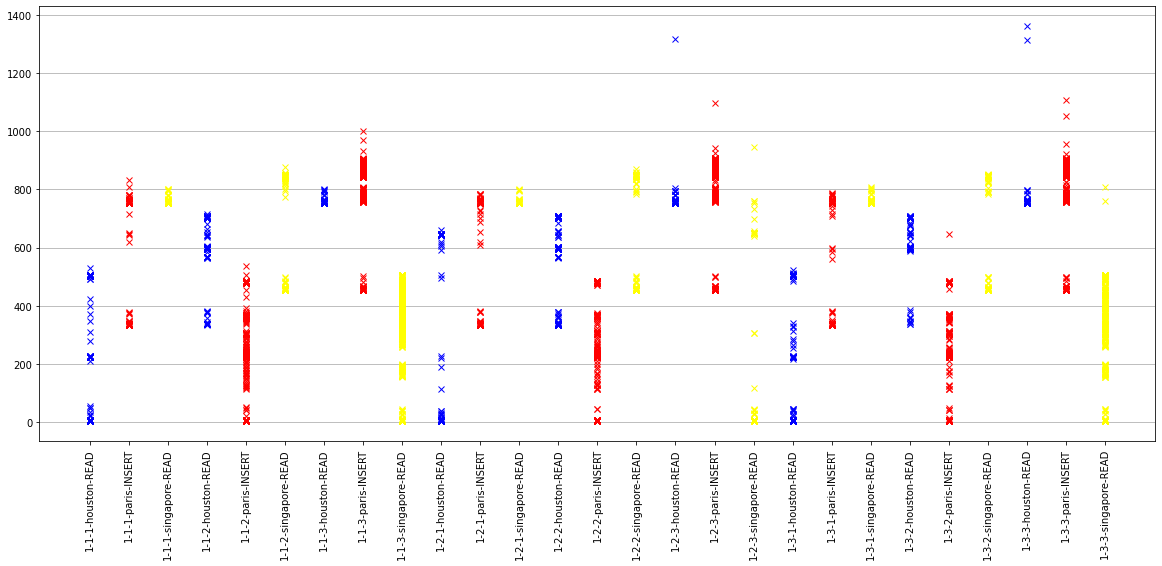

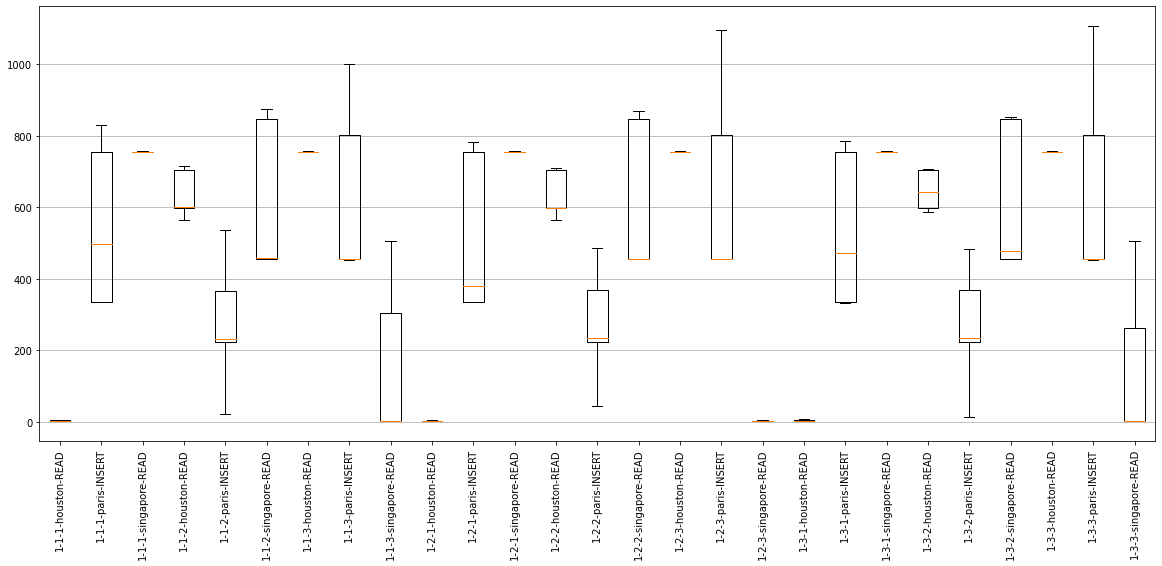

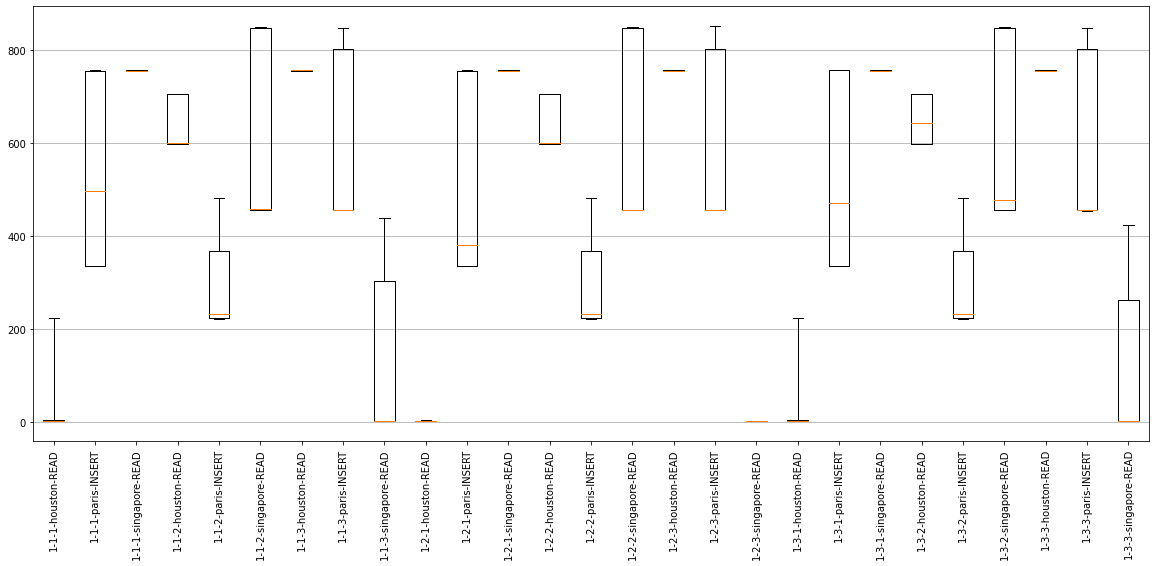

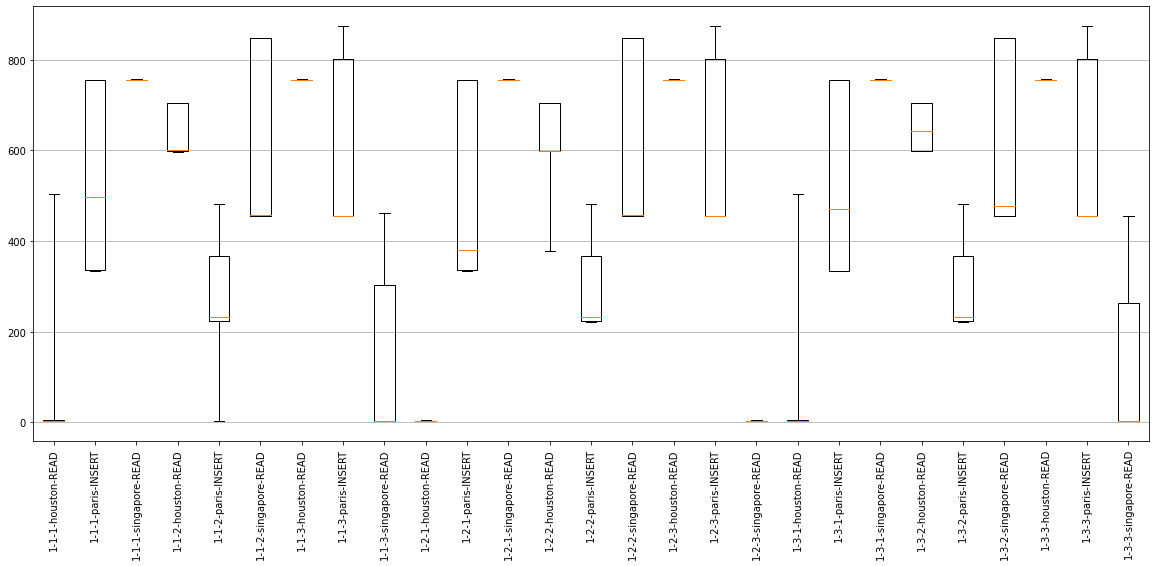

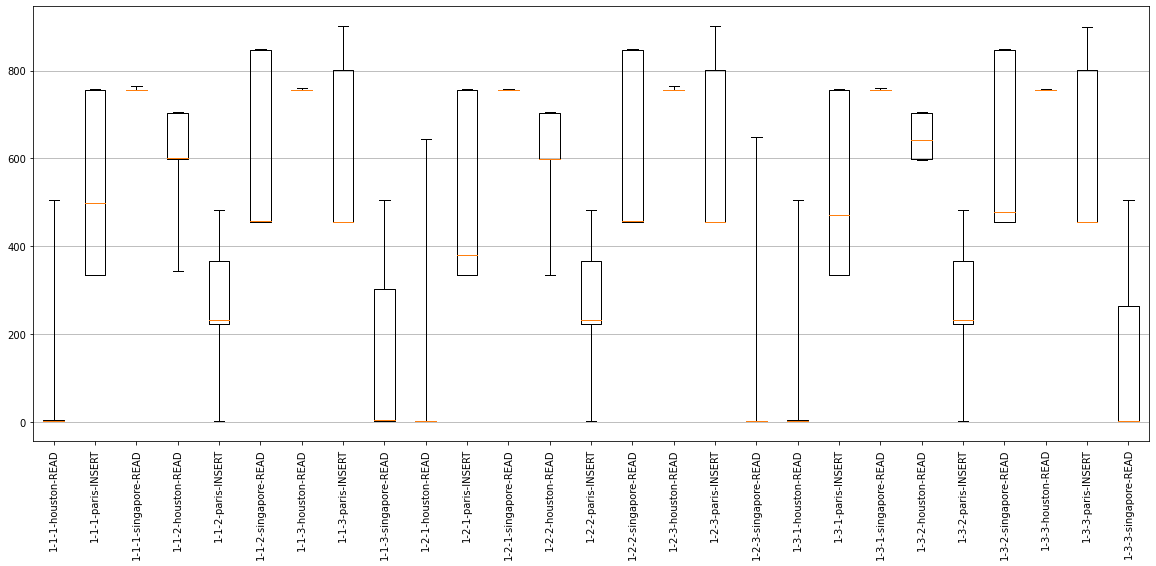

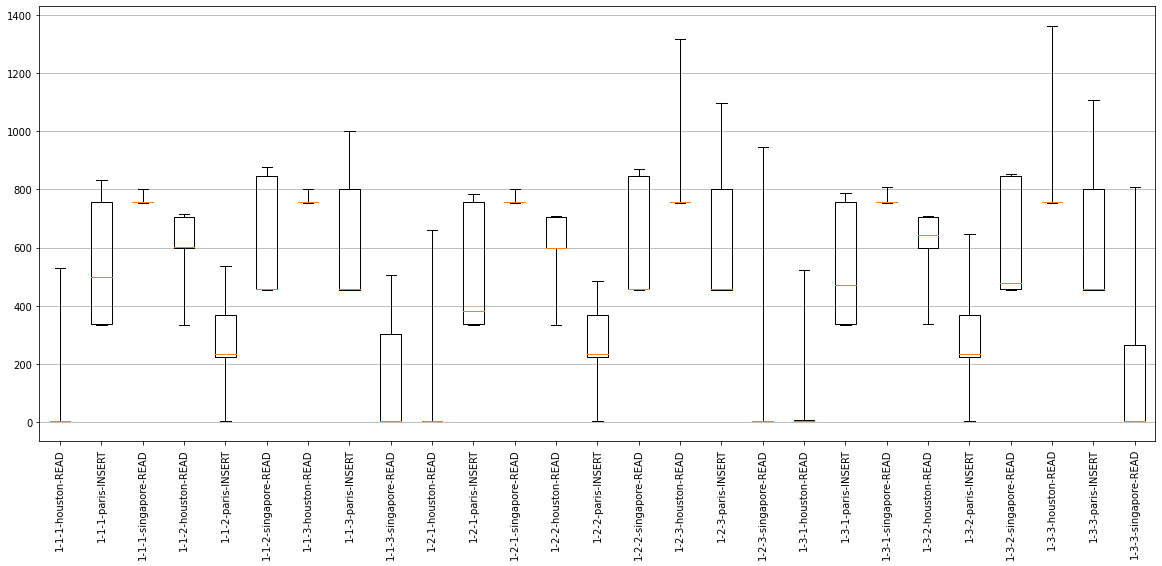

In [22]:
plot(wl_values, wl, replicas, name)